# **Classificação de Adimplentes ou Inadimplentes**

---




## **Entendimento do Negócio** <a name="entendimento_negocio"></a>  

#### **Contexto**  
<p align ="justify">A gestão de risco de crédito é um processo crucial para diversas empresas, especialmente instituições financeiras que buscam minimizar prejuízos causados pela inadimplência. Por meio de técnicas preditivas, é possível estimar a probabilidade de um indivíduo que recebe crédito cumprir ou não com suas obrigações financeiras, permitindo decisões mais estratégicas e seguras. Neste projeto iremos analisar uma base de clientes de uma instituição financeira apartir de caracteristicas como gênero, idade, escolaridade entre outros. </p>

#### **Objetivos do Projeto**  
<p align ="justify">O objetivo deste projeto é desenvolver um modelo preditivo capaz de identificar o risco de inadimplência, definido como a ocorrência de um atraso no pagamento superior a 90 dias dentro de um período de 12 meses. Para isso, o modelo utilizará variáveis disponíveis no momento da solicitação do cartão de crédito para classificar os indivíduos em dois grupos:</p>  

- **Bons pagadores (default = 0)**: clientes com baixa probabilidade de inadimplência.  
- **Maus pagadores (default = 1)**: clientes com alto risco de inadimplência.  

<p align ="justify">Com essa abordagem, os bancos poderão tomar decisões mais informadas e criteriosas ao conceder crédito, reduzindo perdas financeiras e otimizando a carteira de clientes.</p>  

### **Métricas de Avaliação**  
Realizaremos a avaliação de nosso modelo com métricas apropriadas para classificação desequilibrada:

- Acurácia (Treino e Teste)
- Precision
- Recall
- F1-Score
- AUC-ROC
- Matriz de confusão

---


## **Coleta e Preparação dos Dados** <a name="coleta_preparacao"></a>

### Import das bibliotecas/pacotes <a name="import"></a>

<div style="text-align: right"
  
Aqui concentrarei todas as bibliotecas utilizadas durante o projeto

[Voltar ao índice](#Contents)

In [ ]:
# ================================
# Bibliotecas para Manipulação de Dados
# ================================
import pandas as pd
import numpy as np

# ================================
# Bibliotecas para Visualização de Dados
# ================================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ================================
# Pré-processamento e Transformações
# ================================
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# ================================
# Modelos de Machine Learning
# ================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Modelos de Boosting
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ================================
# Avaliação de Modelos e Métricas
# ================================
from sklearn.metrics import (
    accuracy_score, confusion_matrix, f1_score,
    precision_score, recall_score, roc_auc_score,
    classification_report, mean_absolute_error,
    mean_squared_error
)

# ================================
# Validação Cruzada e Otimização
# ================================
from sklearn.model_selection import (
    train_test_split, KFold, cross_val_score, GridSearchCV
)

# ================================
# Interpretação de Modelos
# ================================
import shap

# ================================
# Configurações Gerais
# ================================
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Importação dos Dados <a name="importacao_dados"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
df = pd.read_csv('credito.csv')

### Entendimento dos Dados <a name="entendimento_dados"></a>

<p align="justify">
Nesta etapa, iniciaremos a exploração da base de dados por meio de uma análise inicial das primeiras e últimas linhas do dataset. O objetivo é compreender os tipos de variáveis presentes e obter uma noção geral sobre o conteúdo dos dados. Em seguida, consultaremos o dicionário de dados para entender o significado de cada feature e facilitar futuras análises.</p>

[Voltar ao índice](#Contents)

### Informações e visualização dos dados importados <a name="info"></a>

<div style="text-align: right"

Iniciaremos a exploração visualizando as 5 primeiras e 5 últimas entradas do DataFrame, obtendo assim uma visão geral de sua organização.

[Voltar ao índice](#Contents)

- Visualizando as 5 primeiras  entradas

In [ ]:
df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


- Visualizando as 5 últimas entradas

In [ ]:
df.tail()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62
10126,714337233,1,43,F,2,mestrado,casado,menos que $40K,silver,25,6,4,2,"10.388,80","10.294,96",61


### Dicionário das variáveis <a name=dicionario></a>


<p align="justify">
Com as 5 primeiras entradas impressas na tela, pode-se ter então uma noção de como os dados estão estruturados, bem como quais são as variáveis mais importantes para o início da investigação. A seguir apresentaremos uma tabela contendo o significado de cada variável do DataFrame:</p>
  


| Variável                | Descrição                  | Tipo de Variável         |
|-------------------------|----------------------------------------------------------------|--------------------------|
| id | Identificação única do cliente |Int|
| default | Indica se o cliente entrou em inadimplência (1 = Sim, 0 = Não) | String(Binária)|
| idade | Idade do cliente | Int |
| sexo | Gênero do cliente (Masculino/Feminino) | String|
| dependentes | Número de dependentes do cliente | Int|
| escolaridade | Nível de escolaridade do cliente | String|
| estado_civil | Estado civil do cliente (Solteiro, Casado, etc.) | String|
| salario_anual | Faixa salarial anual do cliente | String |
| tipo_cartao | Tipo de cartão de crédito do cliente | String|
| meses_de_relacionamento | Quantidade de meses que o cliente mantém relacionamento | Int |
| qtd_produtos | Quantidade de produtos adquiridos pelo cliente | Int |
| iteracoes_12m | Número de interações do cliente nos últimos 12 meses | Int |
| meses_inativo_12m| Quantidade de meses inativo nos últimos 12 meses| Int |
| limite_credito| Limite de crédito disponível para o cliente| String |
| valor_transacoes_12m | Valor total das transações nos últimos 12 meses |String|
| qtd_transacoes_12m | Quantidade total de transações nos últimos 12 meses | Int|



[Voltar ao índice](#Contents)

## **Exploração de Dados**


<p align = 'justify'>Este estudo analisa um conjunto de dados no formato <code>.csv</code> contendo informações sobre clientes de uma instituição financeira. O objetivo principal é modelar a variável <code><b>default</code></b>, que indica se um cliente é <b>adimplente (default = 0) ou inadimplente (default = 1)</b>, com base em outros atributos como salário, escolaridade e movimentação financeira.</p>

<p align = 'justify'>A análise inicial explorará a estrutura do conjunto de dados, incluindo o número de linhas e colunas, bem como os tipos de dados de cada coluna. Em seguida, será realizada a limpeza e o tratamento dos dados, abordando questões como dados faltantes, duplicados, outliers e possíveis inconsistências. O objetivo é construir um modelo preditivo robusto para identificar os fatores que influenciam a inadimplência dos clientes.</p>

### Analisando a estrutura do Dataset <a name=estrutura></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

- Obtendo o **`número de linhas e colunas`** do DataFrame

In [ ]:
df.shape

(10127, 16)

In [ ]:
print(f'O dataframe possui {df.shape[0]} linhas e {df.shape[1]} colunas')

O dataframe possui 10127 linhas e 16 colunas


- Obtendo **`nomes das colunas`** do DataFrame

In [ ]:
df.columns

Index(['id', 'default', 'idade', 'sexo', 'dependentes', 'escolaridade',
       'estado_civil', 'salario_anual', 'tipo_cartao',
       'meses_de_relacionamento', 'qtd_produtos', 'iteracoes_12m',
       'meses_inativo_12m', 'limite_credito', 'valor_transacoes_12m',
       'qtd_transacoes_12m'],
      dtype='object')

- Exibindo um **`resumo das informações`** do DataFrame

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             10127 non-null  object
 6   estado_civil             10127 non-null  object
 7   salario_anual            10127 non-null  object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

<p align="justify">A análise inicial do conjunto de dados revelou a ausência de valores faltantes. O dataframe é <code>constituído por 10.127 registros e 16 atributos</code>, sendo 9 numéricos e 7 categóricos. Entretanto, uma inconsistência foi identificada: as variáveis <b>limite_credito e valor_transacoes_12m</b>, que representam valores quantitativos, foram erroneamente categorizadas. Para garantir a precisão das análises subsequentes, é fundamental realizar a conversão dessas variáveis para o tipo numérico.</p>

### **Limpeza e Transformação dos Dados** <a name=limpeza></a>

<p align= "justify">

Após analisarmos a estrutura do dataset iremos realizar a limpeza e transformação dos dados, etapa fundamental para garantir a qualidade e a confiabilidade dos resultados. Nesta etapa, realizaremos as seguintes atividades:</p>



### **Limpeza:**

- Indentificando e Tratando Valores Ausentes
- Identificando e Valores Duplicados
- Identificando e Tratando Outliers


### **Transformação:**
- Correção de Inconsistências:
  - limite_credito          
  - valor_transacoes_12m


[Voltar ao índice](#Contents)

#### *Dados Ausentes*

In [ ]:
# Verificando se existem missing values (valores faltantes)

df.isna().sum()

,0
id,0
default,0
idade,0
sexo,0
dependentes,0
escolaridade,0
estado_civil,0
salario_anual,0
tipo_cartao,0
meses_de_relacionamento,0


Como vimos na análise inical, o dataset não possui valores ausentes.

#### Identificando Valores Duplicados<a name=duplicados></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
# Identificando linhas duplicadas

duplicados = df.duplicated().sum()
print(f'O dataframe possui {duplicados} linhas duplicadas')

O dataframe possui 0 linhas duplicadas


O dataset não possui linhas duplicadas ou valores ausentes, o que facilitará nossa análise.

#### Identificando e Tratando Outliers<a name=outilier></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [ ]:
# Criando um Boxplot para cada variável do DataFrame

for column in df:
  fig = px.box(df, y=column, title=f"Distribuição da variável {column}",
                     labels={column: column})
  fig.show()

# Calcule os limites do IQR para cada coluna numérica
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

# Identifique outliers para cada coluna
outliers = (df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))
print(f"Número de outliers identificados na coluna {column}:")
print(outliers.sum())

Número de outliers identificados na coluna qtd_transacoes_12m:
2


#### *Transformando as variáveis*  **valor_transacoes_12m** e **limite_credito**###


<p align ='justify'> Conforme identificado anteriormente, as variáveis <b>valor_transacoes_12m</b> e <b>limite_credito</b>, que intuitivamente deveriam ser numéricas, estão sendo interpretadas como categóricas (<b>dtype = object</b>). Essa discrepância pode comprometer a qualidade das análises. Para garantir resultados mais precisos e coerentes, é essencial converter essas variáveis para o tipo numérico adequado.</p>


In [ ]:
# Identificando o tipo das colunas 'valor_transacoes_12m' e 'limite_credito'

df[['valor_transacoes_12m', 'limite_credito']].dtypes

,0
valor_transacoes_12m,object
limite_credito,object


In [ ]:
# Funcao para converter cada linha da coluna
def funcao(valor):
  try:
    return float(valor.replace(".", "").replace(",", "."))
  except AttributeError:
    return float(valor) # If it's already a float, return it directly

#aplica para a coluna "limite_credito"
df['limite_credito'] = df['limite_credito'].apply(funcao)

#aplica para a coluna "valor_transacoes_12m"
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(funcao)

In [ ]:
# Verificando os tipos da colunas após a conversão das variáveis 'valor_transacoes_12m' e 'limite_credito'

df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


Após a transformação das variáveis `limite_credito` e `valor_transacoes_12m` nosso dataframe passa a ter  11 atributos numéricos e 5 categóricos.

### **Análise Exploratória de Dados (EDA)** <a name=EDA></a>


Nesta etapa do projeto, realizaremos a **Análise Exploratória dos Dados (EDA)**. O objetivo é compreender melhor a estrutura do conjunto de dados e identificar padrões relevantes para nossa análise.

Para isso, serão aplicadas as seguintes análises:

- **Análise univariada**: avaliação individual de cada variável, observando sua distribuição.
- **Análise bivariada**: investigação da relação entre cada variável e a variável alvo (`inadimplência`), a fim de identificar quais fatores podem influenciar diretamente o comportamento dos clientes.
- **Análise de correlação**: exame das relações entre variáveis numéricas para detectar possíveis colinearidades ou padrões conjuntos.

Essas etapas são fundamentais para direcionar a escolha das variáveis mais relevantes na etapa de modelagem preditiva.

[Voltar ao índice](#Contents)

#### Análise Univariada <a name="univariada"></a>

<p align='justify'>Com o objetivo de explorar os dados de forma individualizada, realizaremos uma análise de cada variável. Criaremos duas funções para facilitar a plotagem dos gráficos: uma utilizando a função <code>plot.bar</code> do Matplotlib para variáveis categóricas e outra com <code>sns.histplot</code> do seaborn para variáveis numéricas.</p>

- Função para Variáveis Categóricas

In [ ]:
def distribuicao_univariada(column):
    '''Cria gráficos de barras com rótulos para variáveis categóricas.'''
    plt.figure(figsize=(8, 6))

    # Cria o gráfico de barras
    grafico_barras = df[column].value_counts().plot.bar()

    # Título e rótulos dos eixos
    plt.title(f'Distribuição de {column}', fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Contagem', fontsize=12)
    plt.xticks(rotation=45)

    # Adiciona os rótulos de contagem em cima das barras
    for p in grafico_barras.patches:
        grafico_barras.annotate(
            str(int(p.get_height())),            # texto com a altura (contagem)
            (p.get_x() + p.get_width() / 2, p.get_height()),  # posição (centralizada)
            ha='center', va='bottom', fontsize=10, color='black'
        )

    plt.tight_layout()
    plt.show()


- Função para Variáveis Numéricas

In [ ]:
def distribuicao_numerica(column):
  '''Essa função ajudará a visualizar distribuições de variáveis através do hist'''

  plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
  sns.set_theme(style='darkgrid') # Define o tema escuro para os gráficos
  # Criar o gráfico de barras com a paleta personalizada
  # Pass only the column data to hist()
  plt.hist(df[column], bins=50)
  plt.title(f'Distribuição de {column}', fontsize=14)  # Título do gráfico
  plt.xlabel(column, fontsize=12)  # Rótulo do eixo X
  plt.ylabel('Contagem', fontsize=12)  # Rótulo do eixo Y
  plt.xticks(rotation=45)  # Gira os rótulos do eixo X para melhor leitura
  plt.show()  # Exibe o gráfico

> Atributos **categóricos**

- Distribuição da variável **`sexo`**

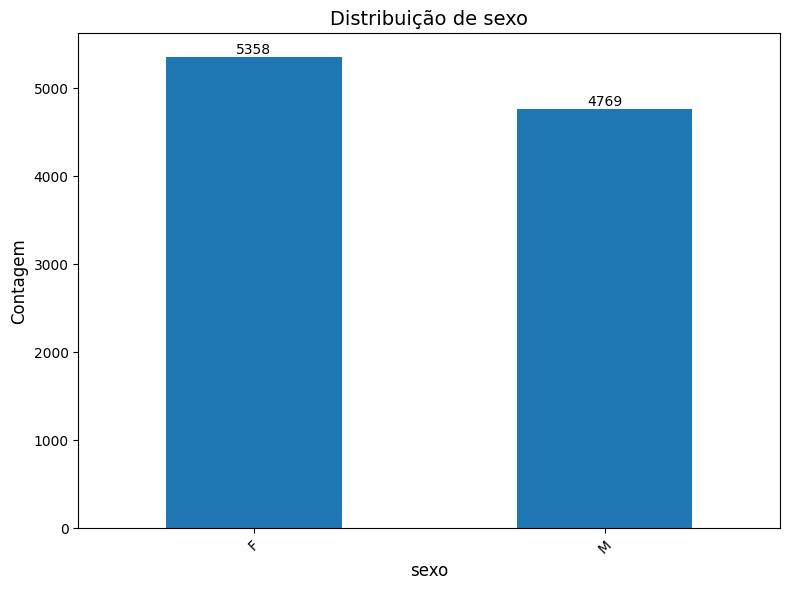

In [ ]:
distribuicao_univariada('sexo')

<p align="justify">Após a análise da variável <b><code>sexo</code></b>, observamos que a maioria dos registros em nosso dataset corresponde a <b>mulheres</b>. No entanto, a diferença em relação ao número de <b>homens</b> é pequena, indicando uma distribuição relativamente equilibrada entre os dois grupos. Isso sugere que o conjunto de dados possui uma certa <b>homogeneidade de gênero</b>, o que é positivo para evitar vieses em análises e modelos preditivos.</p>

<p align="justify">Essa distribuição balanceada permite que análises comparativas entre os sexos — como comportamento de consumo, risco de inadimplência ou engajamento com produtos bancários — sejam feitas de forma mais robusta e confiável, sem necessidade imediata de ajustes por desbalanceamento amostral. Isso também pode ajudar na criação de estratégias mais equitativas e personalizadas para cada grupo.</p>

---

- Distribuição da variável **`escolaridade`**

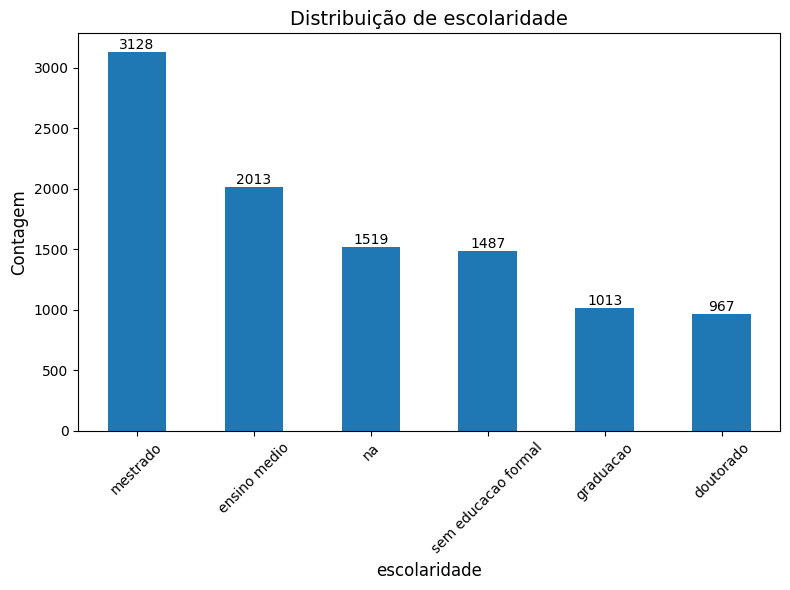

In [ ]:
distribuicao_univariada('escolaridade')

<p align ="justify">Após a análise da variável <code><b>escolaridade</code></b>, constatou-se que a base de clientes <b>apresenta um predomínio de indivíduos com alto nível de educação, sendo o Mestrado o nível de escolaridade mais frequente</b>. Em segundo lugar, destaca-se o Ensino Médio. A análise também revela a presença de clientes que não informaram seu nível de escolaridade e de uma parcela com educação informal. Os níveis de Graduação e Doutorado são os menos representativos na amostra analisada.</p>

<p align ="justify">Há a necessidade de investigar se a alta escolaridade pode influenciar o tipo de produto/serviço procurado, a capacidade financeira e o comportamento de risco (considerando o contexto de análise de crédito).</p>

- Distribuição da variável **`salario_anual`**



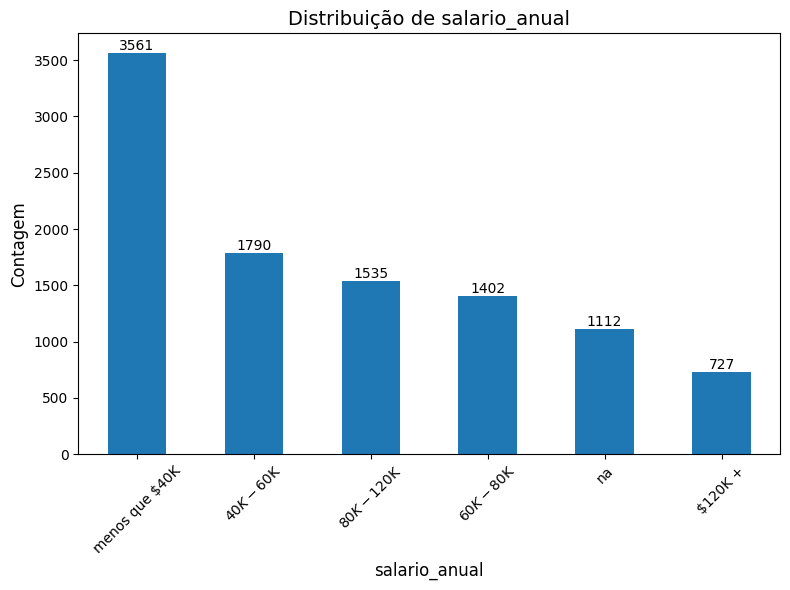

In [ ]:
distribuicao_univariada('salario_anual')

<p align="justify">Após analisar a variável <b><code>salario_anual</b></code> o gráfico revela uma distribuição salarial com uma forte concentração na faixa mais baixa <b>menos que $40K</b> indicando que a maioria dos clientes da instituição financeira possuem salários mais baixos. Notase também um decréscimo gradual à medida que a renda aumenta,ou seja,  à medida que as faixas salarial aumentam, o números de clientes em cada faixa diminui,  sugerindo uma possível disparidade salarial e implicando considerações importantes em análises como a de risco de inadimplência.</p>



- Distribuição da variável **`estado_civil`**


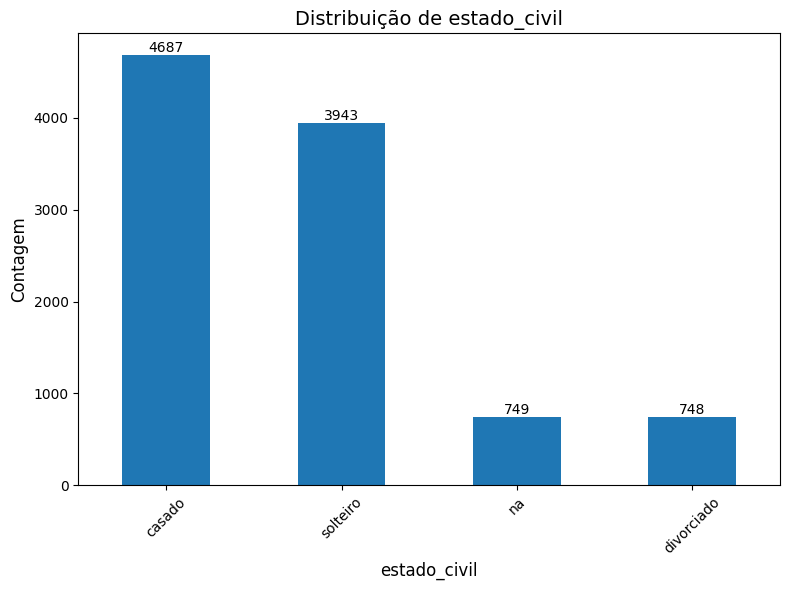

In [ ]:
distribuicao_univariada('estado_civil')

<p align="justify">Após a analise da variável <b><code>estado_civil</code></b> observou que a amioria dos indivíduospresentes em nosso dataset são <b>casados</b>, o que pode indicar um perfil com maior estabilidade (financeira ou pessoal). O número de clientes solteiros também é alto, o que mostra diversidade nos perfis dos clientes da instituição financeira. Notase também a presença de 750 clientes que não declararam seu estado civil. </p>

- Distribuição da variável **`tipo_cartao`**

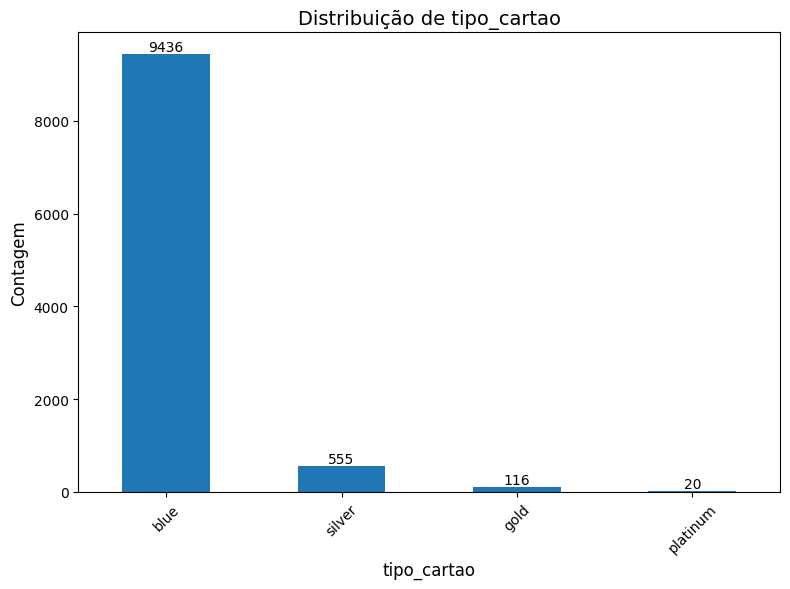

In [ ]:
distribuicao_univariada('tipo_cartao')

<p align="justify">Após a análise da variável <b><code>tipo_cartao</code></b>, observou-se  uma <b>concentração muito alta no cartão do tipo Blue</b>, o que pode indicar que ele é o cartão-padrão ou de entrada na base. Os cartões <b>Silver e Gold</b> têm uma <b>representação significativamente menor</b>, o que pode estar relacionado a critérios mais exigentes de concessão ou perfis de clientes distintos. O cartão <b>Platinum é praticamente irrelevante</b> em termos de quantidade. Pode ser exclusivo para clientes de altíssimo perfil ou pouco ofertado.</p>

---

> Atributos **numéricos**

- Descrição estatísticas das variáveis numéricas

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10127.0,7.391776e+08,3.690378e+07,7.080821e+08,7.130368e+08,7.179264e+08,7.731435e+08,8.283431e+08
default,10127.0,1.606596e-01,3.672348e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
idade,10127.0,4.632596e+01,8.016814e+00,2.600000e+01,4.100000e+01,4.600000e+01,5.200000e+01,7.300000e+01
dependentes,10127.0,2.346203e+00,1.298908e+00,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00
meses_de_relacionamento,10127.0,3.592841e+01,7.986416e+00,1.300000e+01,3.100000e+01,3.600000e+01,4.000000e+01,5.600000e+01
qtd_produtos,10127.0,3.812580e+00,1.554408e+00,1.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00
iteracoes_12m,10127.0,2.455317e+00,1.106225e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
meses_inativo_12m,10127.0,2.341167e+00,1.010622e+00,0.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,6.000000e+00
limite_credito,10127.0,8.632440e+03,9.088788e+03,1.438000e+03,2.555355e+03,4.549420e+03,1.106817e+04,3.451699e+04
valor_transacoes_12m,10127.0,4.404583e+03,3.397128e+03,5.101600e+02,2.155825e+03,3.899590e+03,4.741310e+03,1.848493e+04


- Distribuição da variável `default`

In [ ]:
df[df['default'] == 0].shape


(8500, 16)

In [ ]:
df[df['default'] == 1].shape


(1627, 16)

In [ ]:
# Obtendo a Quantidade Total de Clientes

qtd_total = len(df)

# Quantidade de adimplentes
qtd_adimplentes = len(df[df['default'] == 0])

# Quantidade de inadimplentes
qtd_inadimplentes  = len(df[df['default'] == 1])

print(f'O número total de clientes da base de dados é de {qtd_total}.\n')
print(f'Desse total, {qtd_adimplentes} são adimplentes.\n')
print(f'Desse total, {qtd_inadimplentes} são inadimplentes.\n')

print(f"A proporcão de clientes adimplentes é de  {round(100 * qtd_adimplentes / qtd_total, 2)}%"
 )
print(f"A proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%"
 )

O número total de clientes da base de dados é de 10127.

Desse total, 8500 são adimplentes.

Desse total, 1627 são inadimplentes.

A proporcão de clientes adimplentes é de  83.93%
A proporcão de clientes inadimplentes é de 16.07%


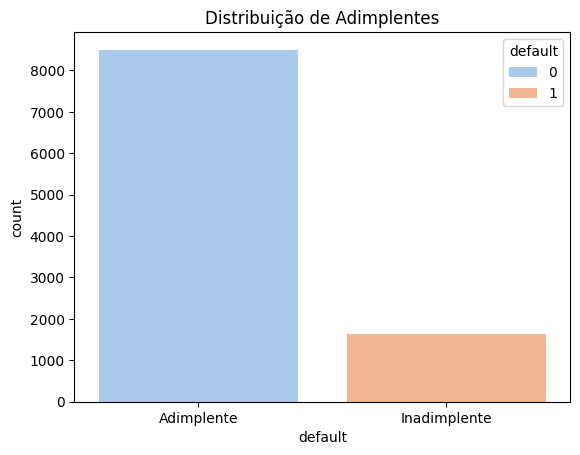

In [ ]:
# Criando o gráfico
sns.countplot(x='default', hue='default', palette='pastel', data=df)

# Definindo os rótulos personalizados
plt.xticks(ticks=[0, 1], labels=['Adimplente', 'Inadimplente'])

# Adicionando título
plt.title('Distribuição de Adimplentes')

# Exibindo o gráfico
plt.show()


Após analisar a variável **`default`** (variável-alvo), observamos que cerca de **16% dos clientes** entraram em inadimplência. Isso sugere que a maioria dos clientes do dataset é adimplente, como podemos verificar no gráfico acima.

- Distribuição da variável **`iteracoes_12m`**

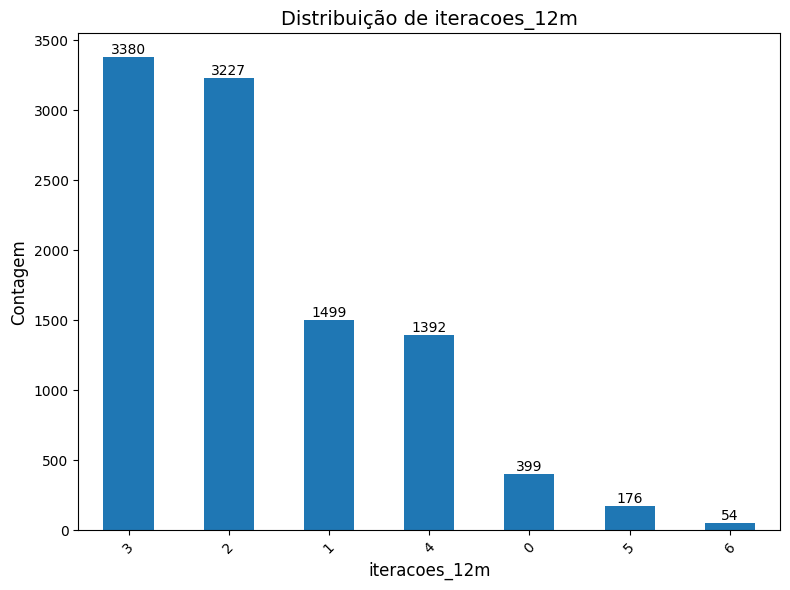

In [ ]:
distribuicao_univariada('iteracoes_12m')

Após analisar a variável **`'iteracoes_12m'`**, observamos que a maioria dos clientes obteviveram de **2 a 3 iterações** ao longo do período de 12 meses. Outro ponto que pode ser observado é a baixa ocorrência de zeros (poucos clientes apresentam zero iterações) podemos inferir  que a maioria interage ao menos uma vez. O que pode estar ligado à tentativas de renegociações ou probelmas com a conta.


- Distribuição da variável **`dependentes`**

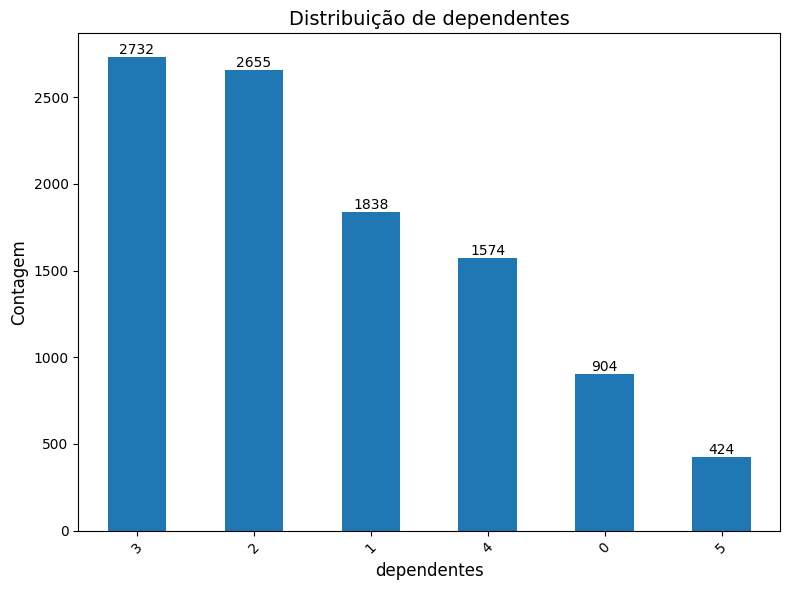

In [ ]:
distribuicao_univariada('dependentes')


<p align ="justify">A análise da variável <code><b>dependentes</code></b> aponta para uma média de 2,35 dependentes por cliente, sugerindo que <b>a maioria dos clientes em nossa base possui 2 ou 3 dependentes</b>. Essa informação é relevante para segmentar clientes, avaliar seu perfil financeiro e direcionar ofertas de produtos e serviços adequados às suas necessidades familiares.<p>

- Distribuição da variável **`qtd_produtos`**

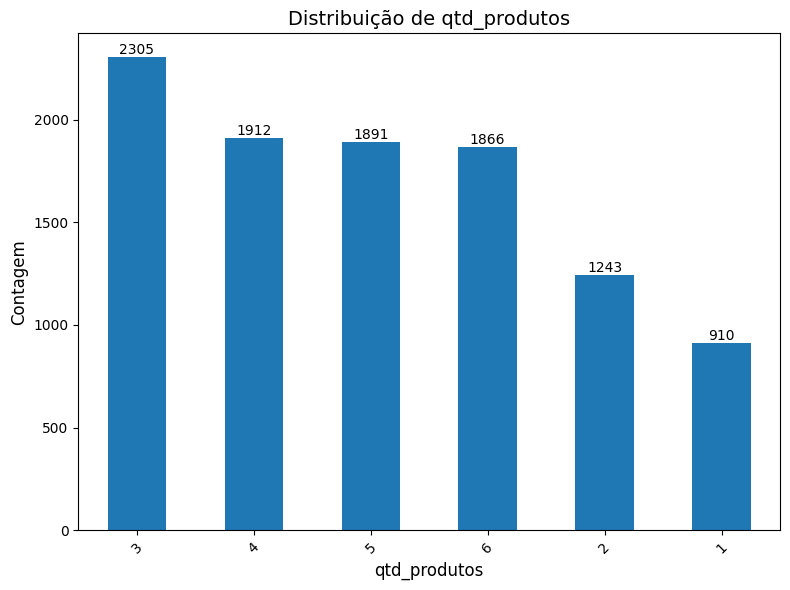

In [ ]:
distribuicao_univariada('qtd_produtos')

<p align="justify">A análise da variável <code><b>qtd_produtos</code></b> indica que os clientes possuem, em média, 3,81 produtos financeiros. Esse valor sugere que uma parcela significativa da base de clientes tende a possuir 3 ou 4 produtos financeiros ativos, representando um nível considerável de relacionamento com a instituição.</p>

- Distribuição da variável **`meses_inativo_12m`**

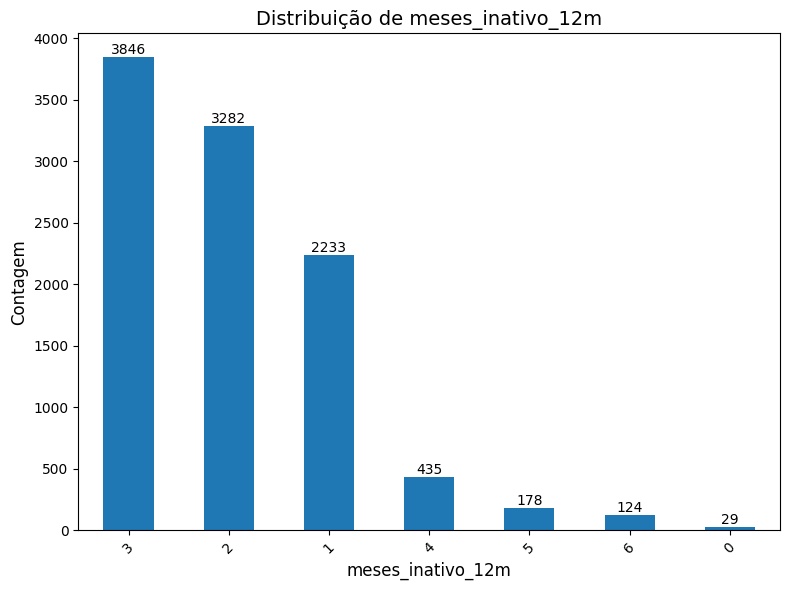

In [ ]:
distribuicao_univariada('meses_inativo_12m')

<p align="justify"> Após analisar a variável <b>`meses_inativo_12m`</b>, observamos que a maioria dos clientes permaneceu inativa por <b>2 a 3 meses</b> ao longo do período de 12 meses, sugerindo uma leve oscilação no engajamento. Menos de <b>10%</b> dos clientes ficaram entre <b>4 a 6 meses inativos</b>, o que indica um grupo com comportamento mais distante, mas ainda não completamente desengajado. Além disso, identificamos um pequeno número de clientes que se mantiveram <b>ativamente engajados durante todo o período</b>, sem nenhum mês de inatividade.</p>

<p align="justify"> Esse padrão sugere que a maior parte da base mantém um relacionamento relativamente constante com o banco, ainda que não contínuo. Os clientes totalmente ativos podem representar um perfil de maior valor, enquanto os com 4 a 6 meses de inatividade podem estar em risco de churn. Vale a pena investigar se há correlação entre tempo de inatividade e inadimplência ou cancelamento futuro.</p>

---


- Distribuição da variável `idade`

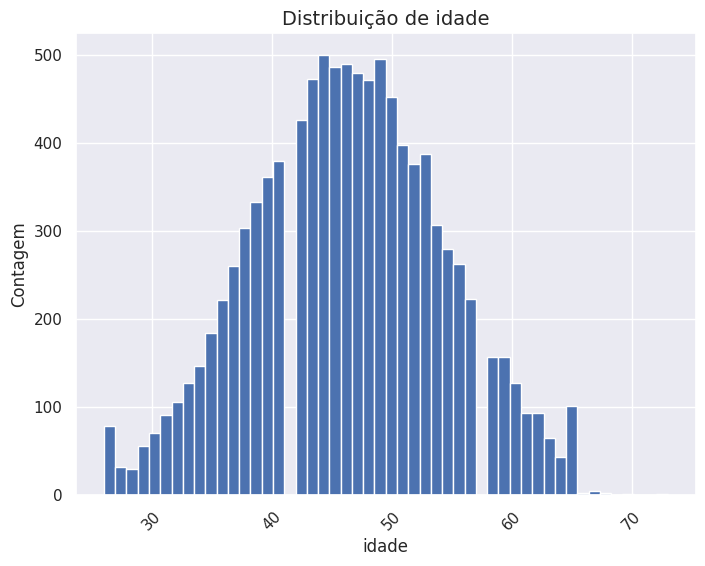

In [ ]:
distribuicao_numerica('idade')

<p align="justify">Após a análise da variável <code><b>idade</code></b>, constatou-se que a faixa etária dos clientes apresenta uma amplitude considerável, variando de <b>26 a 73 anos</b>. No entanto, a distribuição etária não é uniforme, revelando uma <b>concentração significativa de clientes na faixa de 40 a 50 anos</b> sugerirndo que este grupo etário representa o público-alvo principal da instituição financeira. As estratégias de marketing, produtos e serviços podem ser direcionados para atender às necessidades e características específicas dessa faixa etária.</p>

<p align="justify">Clientes entre 40 e 50 anos geralmente estão em uma fase de maior <b>maturidade financeira e profissional</b>, o que pode influenciar seu comportamento de consumo, capacidade de investimento e tolerância ao risco (considerando o contexto de "previsão de adimplência"). Essa faixa etária pode estar associada a diferentes <b>ciclos de vida</b>, como estabelecimento familiar, crescimento profissional e planejamento para o futuro. Compreender esses ciclos pode auxiliar na personalização de ofertas e na avaliação do risco de crédito.</p>

 <p align="justify">Embora a maior concentração esteja entre 40 e 50 anos, a presença de clientes mais jovens (26 anos) e mais experientes (até 73 anos) indica um potencial de crescimento e diversificação da base de clientes, por isso é necessário pensar em estratégias para atrair e reter clientes em outras faixas etárias.<p>


- Distribuição da variável **`meses_de_relacionamento`**

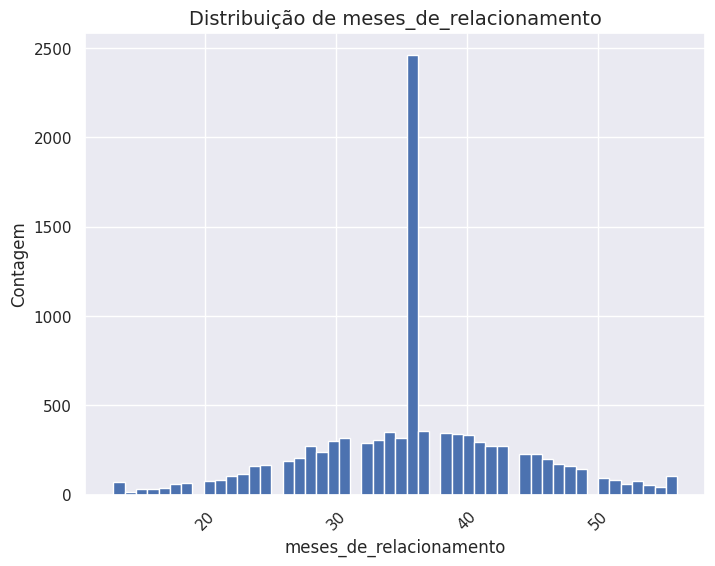

In [ ]:
distribuicao_numerica('meses_de_relacionamento')

Após analisar a variável **`meses_de_relacionamento`**, observamos que o tempo de relacionamento varia de **13 a 61 meses**. A maioria dos clientes tem entre **30 e 40 meses** de relacionamento. Existe um **pico bem acentuado** no valor exato de **36 meses**, indicando uma possível data ou campanha que atraiu muitos clientes de uma só vez ou que os dados imputados com um valor fixo.

- Distribuição da variável **`limite_credito`**

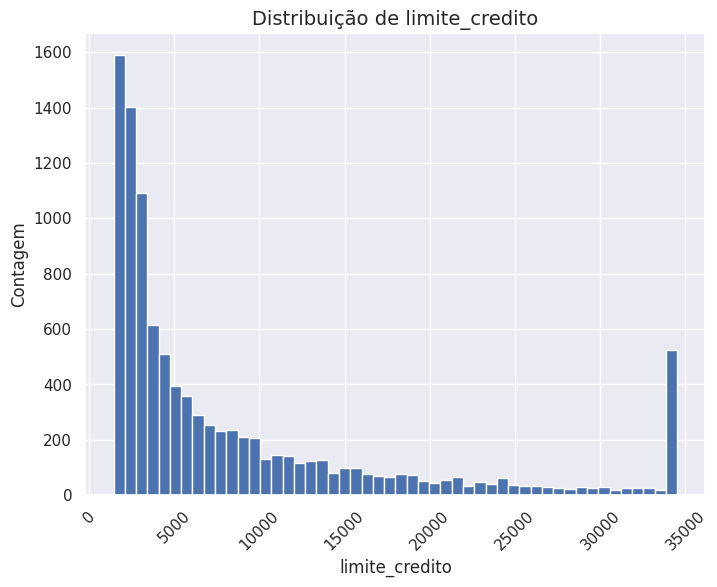

In [ ]:
distribuicao_numerica('limite_credito')

<p align = 'justify'> A análise da variável <b>limite_credito</b> nos revela que <b>a maioria dos clientes possui limites de crédito mais modestos, com uma concentração entre 0 e 5.000.</b> Essa observação é <b>consistente com a análise prévia da variável salário anual</b>, que indicou uma predominância de clientes com rendas anuais mais baixas.</b>

<p align = 'justify'> Conforme o limite de crédito aumenta, observa-se uma <b>diminuição progressiva na frequência de clientes</b>, sinalizando que apenas uma parcela minoritária possui acesso a limites mais elevados.</p>

<p align = 'justify'> Um ponto de destaque é a presença de uma <b>barra isolada em torno de 35.000</b>, sugerindo a existência de um grupo específico de clientes com um limite de crédito consideravelmente superior à maioria. Esse comportamento atípico pode ser explicado por diferentes fatores, como: políticas de crédito diferenciadas aplicadas a um segmento seleto de clientes (por exemplo, clientes de alto valor, com histórico de bom relacionamento) ou possíveis dados anômalos ou erros de entrada que necessitam de investigação e correção para garantir a integridade da análise.</p>

In [ ]:
(df['limite_credito'].describe())

,limite_credito
count,10127.000000
mean,8632.440165
std,9088.788041
min,1438.000000
25%,2555.355000
50%,4549.420000
75%,11068.175000
max,34516.990000


- Distribuição da variável `qtd_transacoes_12m`

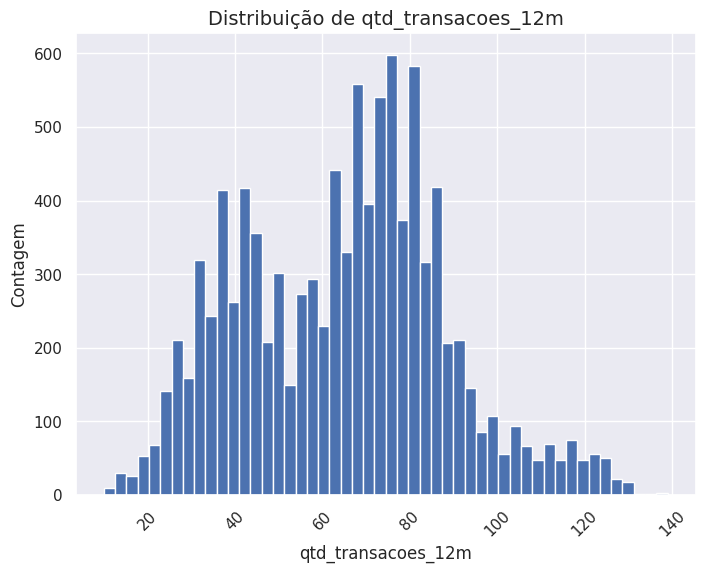

In [ ]:
distribuicao_numerica('qtd_transacoes_12m')

<p align ='justify'> Após analisar a variável <b><code>qtd_transacoes_12m</code></b>, observamos que o número de transações no último ano varia de <b>10 a 139</b>, com uma mediana de <b>67 transações</b>, o que significa que metade dos clientes realiza até esse número de operações anualmente. Além disso, há uma concentração significativa de pessoas que realizaram entre <b>80 e 90 transações</b>. Outro ponto a ressaltar é que o gráfico apresenta uma distribuição  assimétrica, com uma cauda mais longa à direita. Isso indica que há um número menor de pessoas que realizaram um número muito alto de transações, comparado àqueles que realizaram um número menor.</p>

- Distribuição da variável `'valor_transacoes_12m`

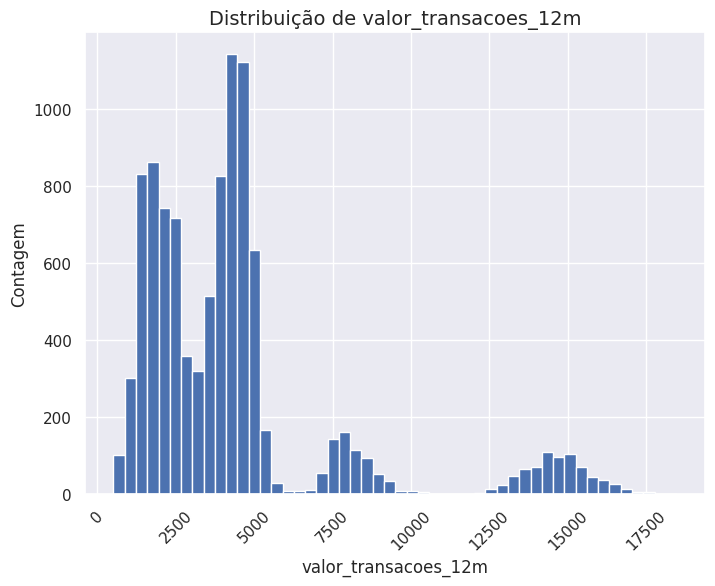

In [ ]:
distribuicao_numerica('valor_transacoes_12m')

<p align = 'justify'>A análise da variável <b>valor_transacoes_12m</b> revelou que a maioria das transações realizadas ao longo de 12 meses se concentra significativamente na faixa de <b>2.500 a 5.000</b>. Esse pico principal sugere que um grande número de clientes efetua transações dentro desses valores, o que pode estar <b>associado ao elevado número de pessoas que possuem limites de crédito mais baixos</b>, conforme observado anteriormente.</p>

<p align = 'justify'>Adicionalmente, o histograma aponta concentrações menores em torno de 7.500 e 15.000, indicando que, embora menos frequentes, transações nesses patamares ainda ocorrem em número relevante. <b>Esse menor volume de transações elevadas pode estar ligado ao pequeno número de clientes que possuem limites de crédito maiores.</b></p>

---


#### **Análise Bivariada** <a name="bivariada"></a>

<p align='justify'>Nesta etapa do projeto, realizaremos uma análise visual detalhada da distribuição das variáveis em realção ao default. As visualizações serão feitas em três perspectivas distintas: em relação ao <strong>total de clientes</strong>, aos <strong>clientes adimplentes</strong> e aos <strong>clientes inadimplentes</strong>. Essa abordagem permite identificar padrões e possíveis influências de cada variável no risco de inadimplência, apoiando decisões futuras na seleção de variáveis para o modelo de classificação.</p>
<p align='justify'> Para isso, serão desenvolvidas duas funções específicas: uma baseada no <code>sns.barplot</code> para visualizar a proporção de variáveis categóricas, e outra com <code>sns.histplot</code> para representar a distribuição de variáveis numéricas.</p


> Visualizações categóricas

- Criando a função para variávies categóricas

In [ ]:
def plot_proporcao_variavel_cat(variavel):
    """
    Função para plotar gráficos de proporção para uma variável específica
    para clientes adimplentes e inadimplentes.

    Parâmetros:
    df (DataFrame): DataFrame contendo os dados dos clientes.
    variavel (str): Nome da variável que será analisada.
    default_col (str): Nome da coluna que indica adimplência/inadimplência. Padrão é 'default'.
    """
    # Filtrando os dados dos clientes adimplentes e inadimplentes
    df_adimplente = df[df['default'] == 0]
    df_inadimplente = df[df['default'] == 1]

    # Títulos para os gráficos
    titulos = [
        f'Proporção de {variavel.capitalize()} dos Clientes',
        f'Proporção de {variavel.capitalize()} dos Clientes Adimplentes',
        f'Proporção de {variavel.capitalize()} dos Clientes Inadimplentes'
    ]

    # Criando o layout para os subgráficos (1 linha, 3 colunas)
    fig, axes = plt.subplots(1, 3, figsize=(20, 8))
    sns.set_theme(style='darkgrid')


    # Função para calcular proporções e criar um DataFrame auxiliar
    def calcular_proporcoes(dataframe, variavel):
        proporcoes = dataframe[variavel].value_counts(normalize=True).reset_index()
        proporcoes.columns = [variavel, 'proporcao']
        return proporcoes

 # Gerando os gráficos para cada grupo (todos, adimplentes e inadimplentes)
    for ax, dataframe, titulo in zip(axes, [df, df_adimplente, df_inadimplente], titulos):
        proporcoes = calcular_proporcoes(dataframe, variavel)
        sns.barplot(x=variavel, y='proporcao', hue=variavel, data=proporcoes, palette='muted', ax=ax)
        ax.set_title(titulo)
        ax.set_ylabel('Proporção')
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()


- Grafico **`escolaridade por default`**

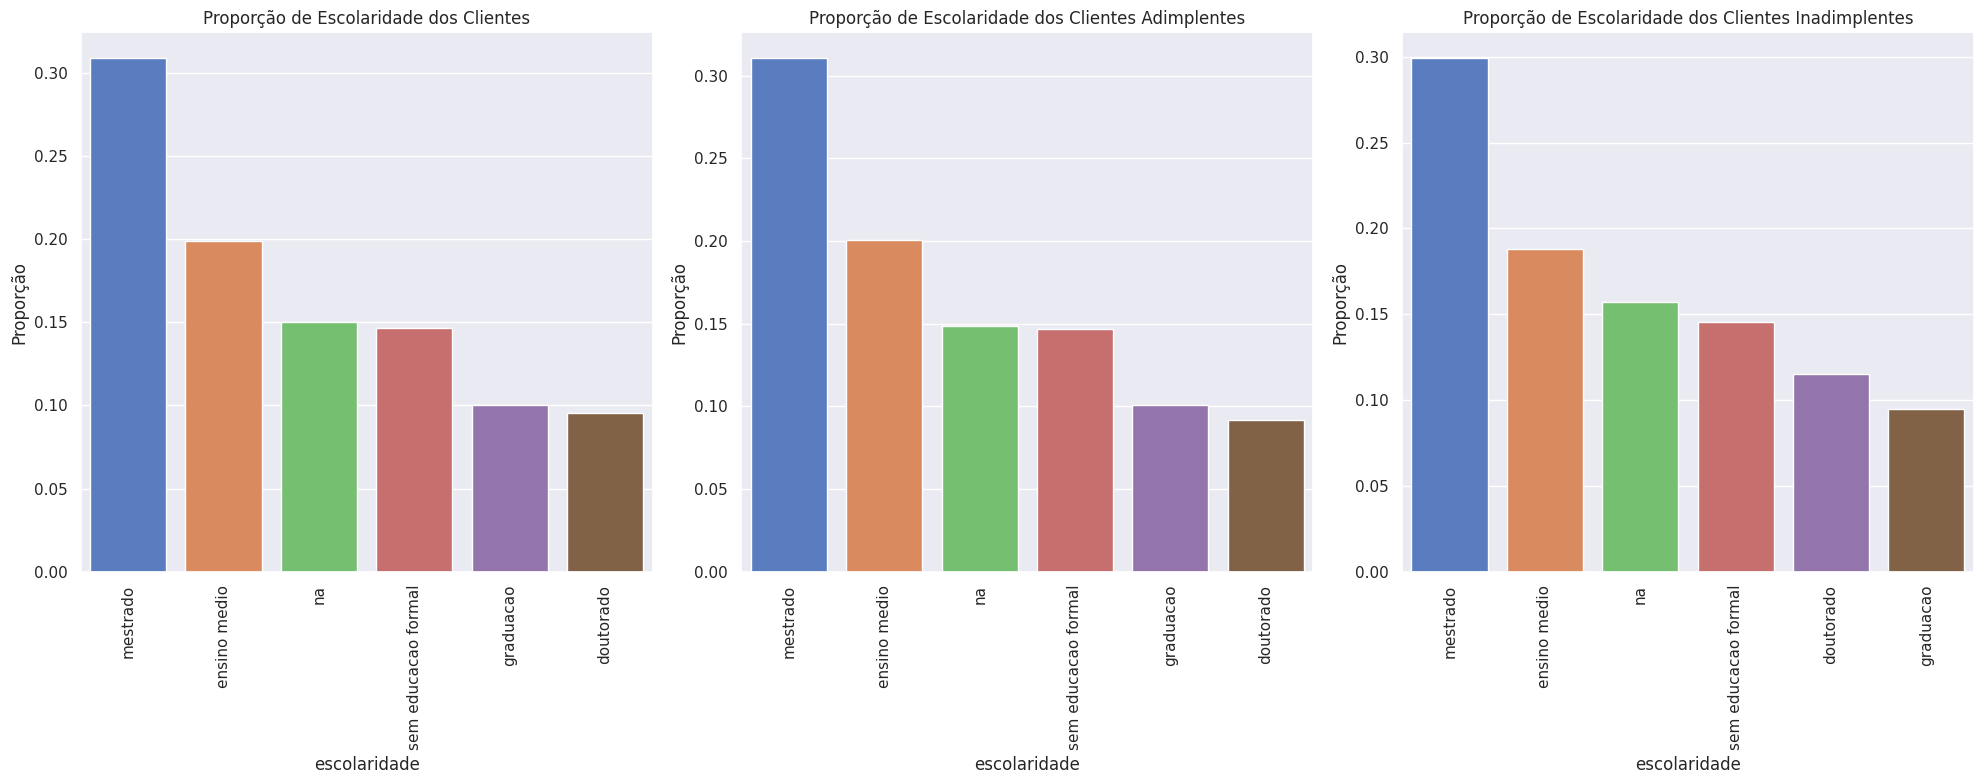

In [ ]:
plot_proporcao_variavel_cat('escolaridade')

<p align = 'justify'>Após a análise da proporção da variável <b><code>escolaridade</code></b> em relação ao <b>default</b>, observamos um padrão semelhante ao identificado na análise univariada. O nível de escolaridade <b>"Mestrado"</b> apresenta a maior proporção em todas as categorias, indicando que clientes com esse grau de formação são predominantes na base de dados.
Além disso, a distribuição dos níveis de escolaridade entre clientes adimplentes e inadimplentes mantém um padrão semelhante, o que pode sugerir que <b>a escolaridade, por si só, não tem um impacto direto na inadimplência</b>. No entanto, para aprimorar a classificação dos indivíduos quanto ao default, é relevante investigar se essa variável possui alguma influência significativa dentro do modelo preditivo.</b>  

---


- Grafico **`salario_anual por default`**

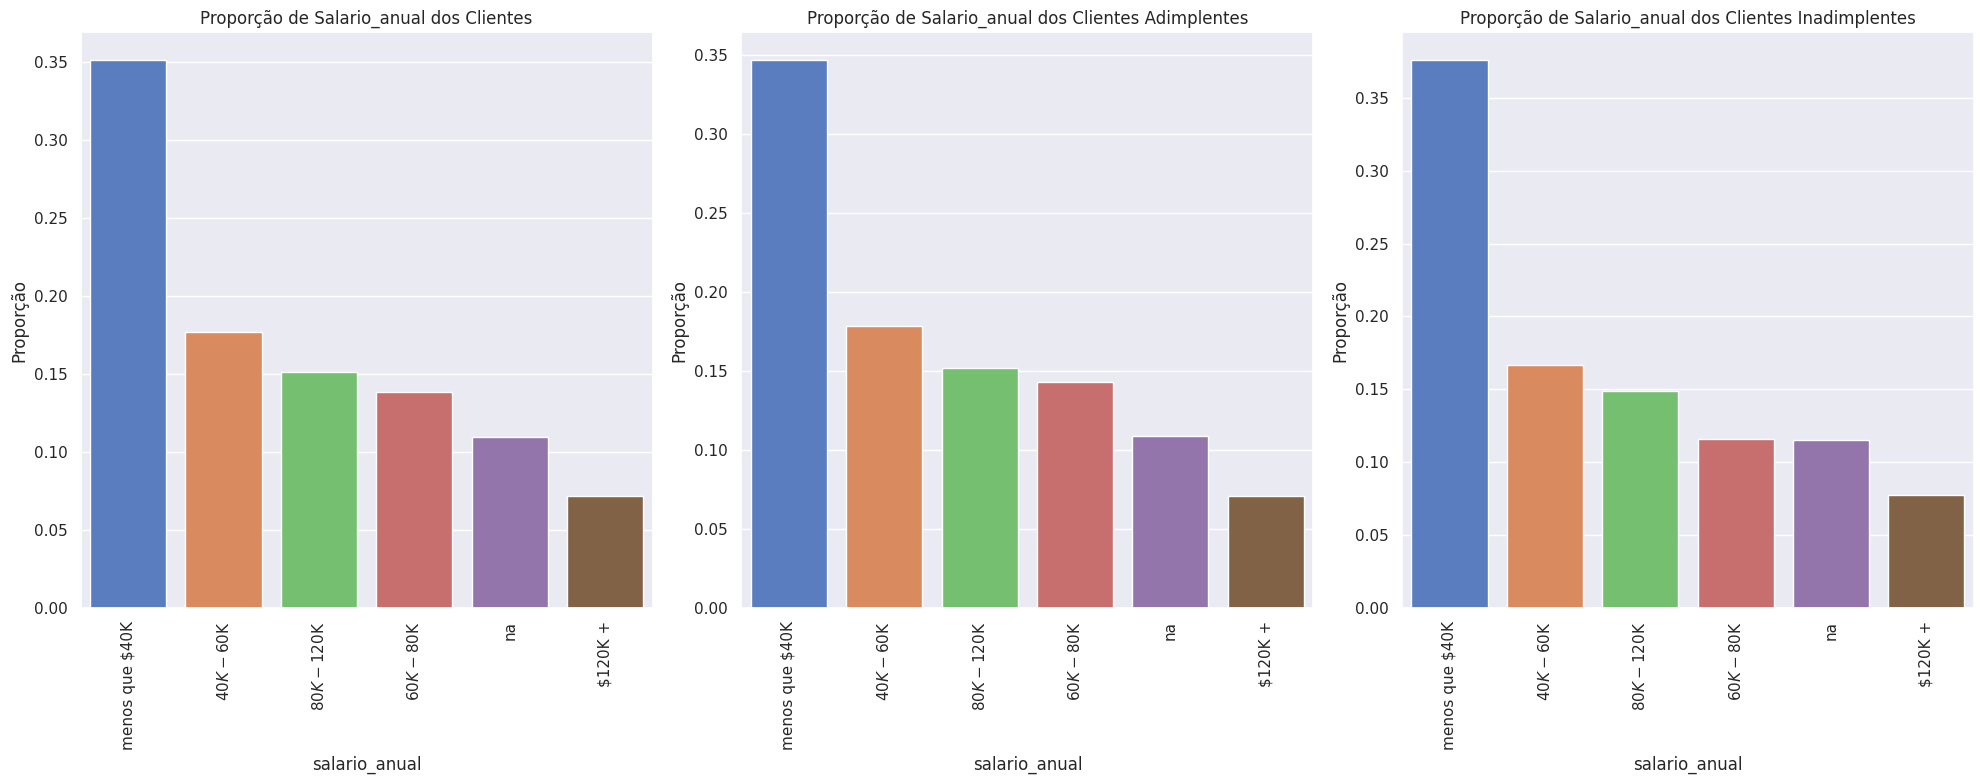

In [ ]:
plot_proporcao_variavel_cat('salario_anual')

<p align = 'justify'> Após a análise da proporção da variável <b><code>salario_anual</code></b> em relação ao <b>default</b>, observamos um padrão semelhante ao identificado na análise univariada. O <b>faixa salarial anual "menor que $40k"</b> apresenta a maior proporção em todas as categorias, indicando que clientes com essa faixa salarial são predominantes na base de dados.
Além disso, a distribuição das faixas salarial anual entre clientes adimplentes e inadimplentes mantém um padrão semelhante, o que pode sugerir que <b>o salário anual, por si só, não tem um impacto direto na inadimplência</b>. No entanto, para aprimorar a classificação dos indivíduos quanto ao default, é relevante investigar se essa variável possui alguma influência significativa dentro do modelo preditivo.</p>  

---

- Grafico **`estado_civil por default`**

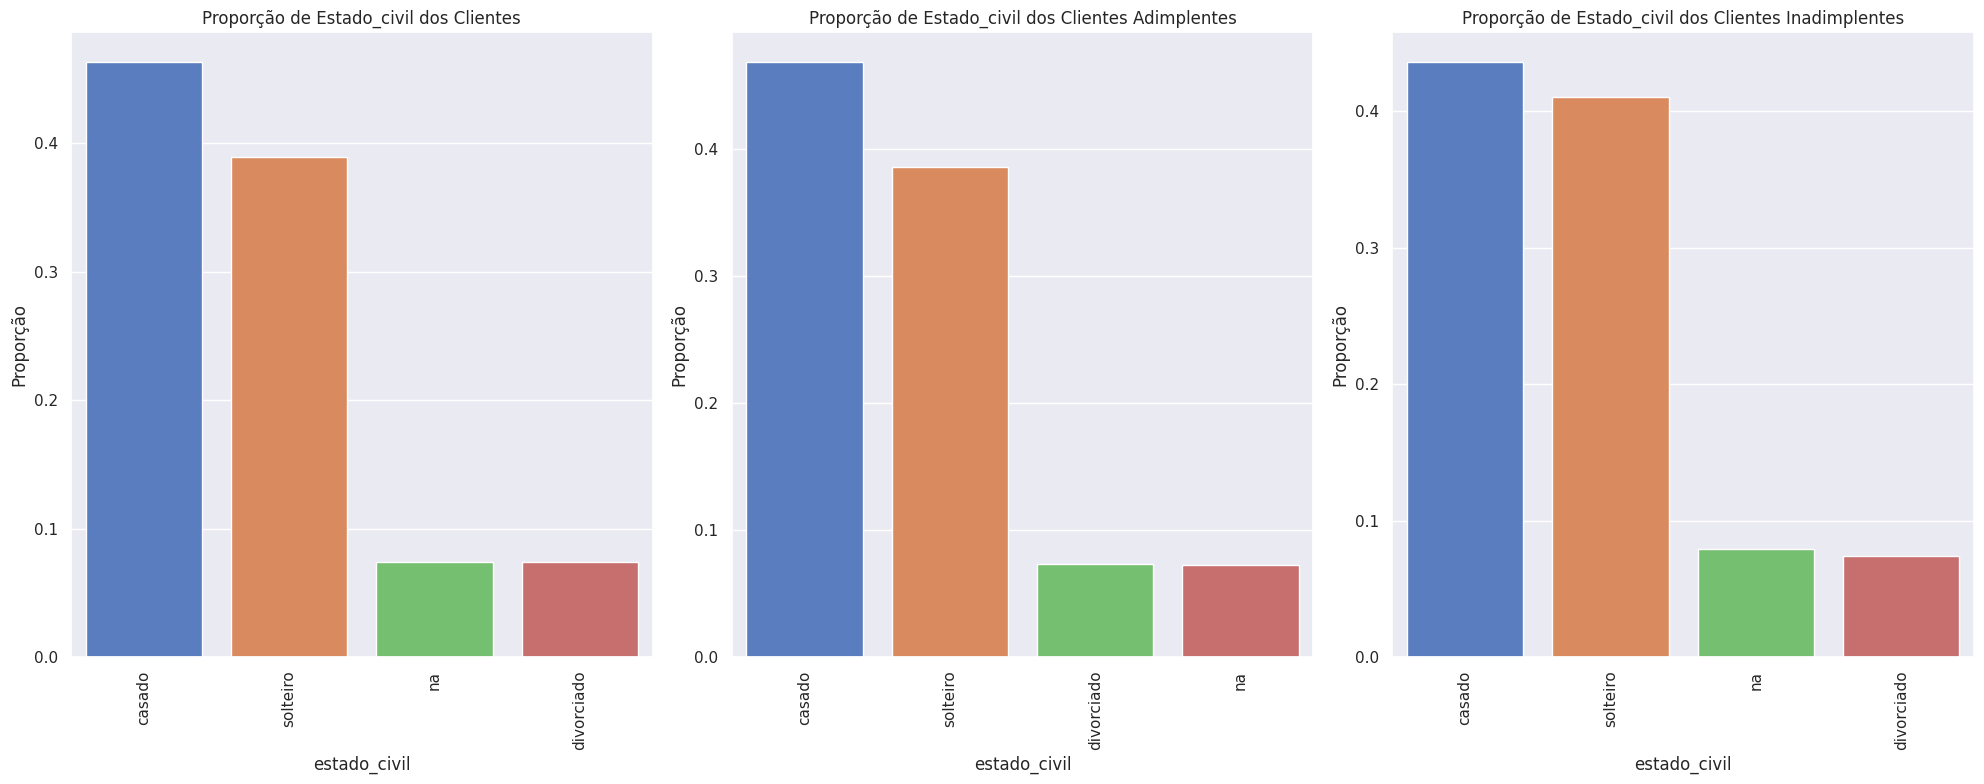

In [ ]:
plot_proporcao_variavel_cat('estado_civil');

<p align = 'justify'> Após a análise da proporção da variável <b><code>estado_civil</code></b> em relação ao <b>default</b>, observamos um padrão semelhante ao identificado na análise univariada. O <b>estado civil "Casado"</b> apresenta a maior proporção em todas as categorias, indicando que clientes casados são predominantes na base de dados.
Além disso, a distribuição dos estados civil entre clientes adimplentes e inadimplentes mantém um padrão semelhante, o que pode sugerir que <b>o estado civil, por si só, não tem um impacto direto na inadimplência</b>. No entanto, para aprimorar a classificação dos indivíduos quanto ao default, é relevante investigar se essa variável possui alguma influência significativa dentro do modelo preditivo.</p>  

---

<p align = 'jstify'> </p>

- Grafico **`tipo_cartao por default`**

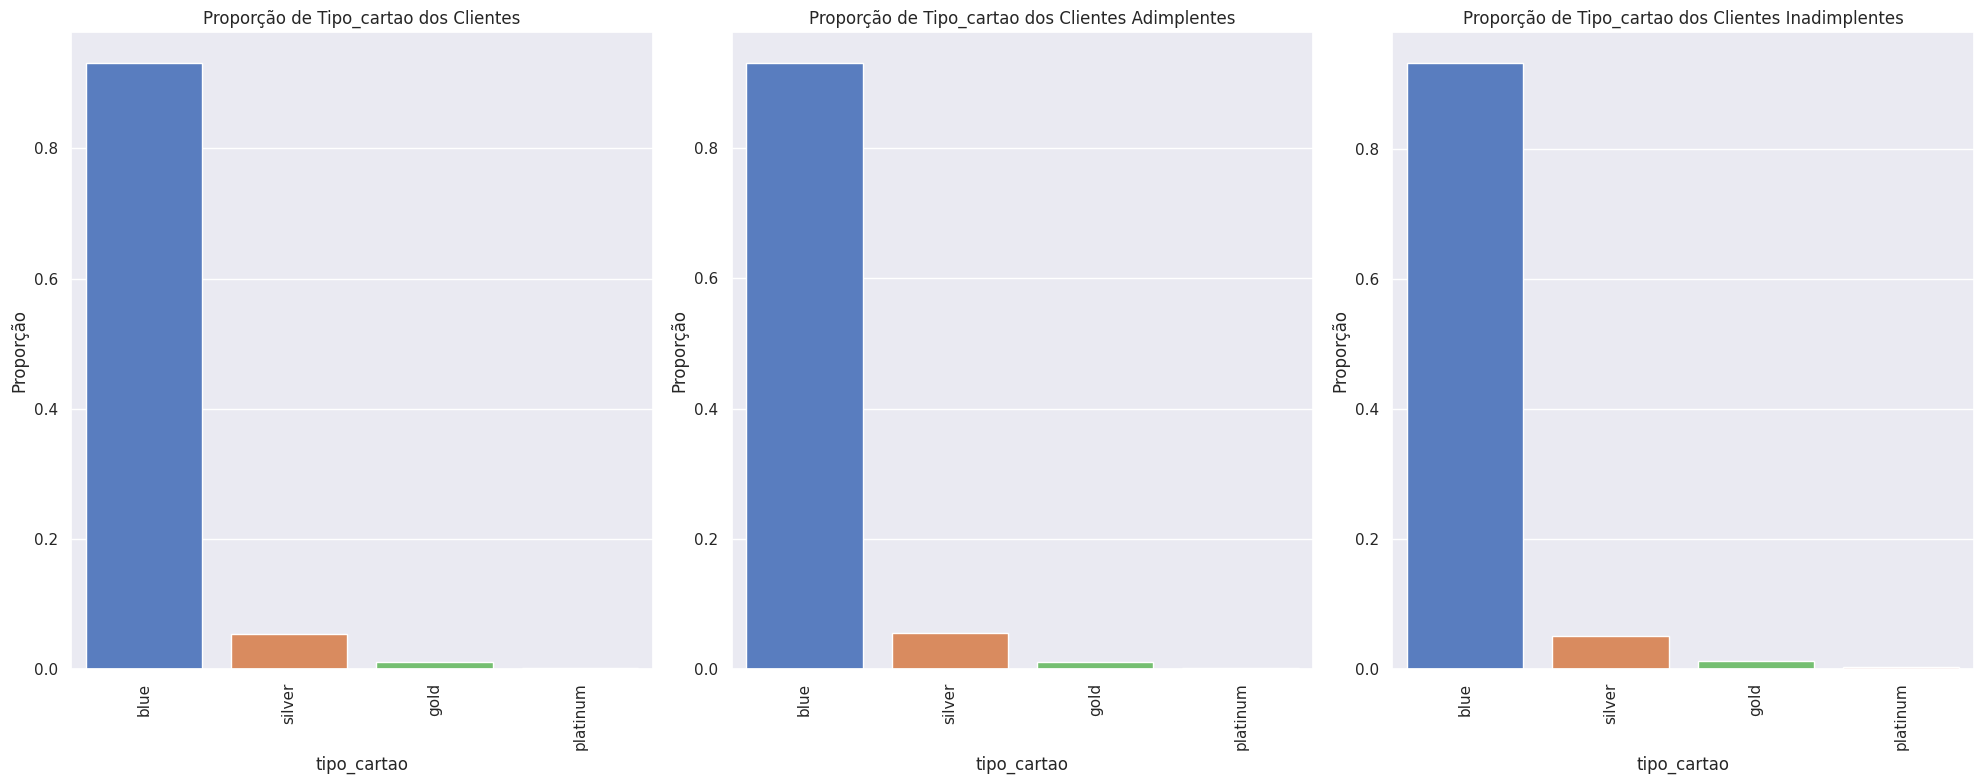

In [ ]:
plot_proporcao_variavel_cat('tipo_cartao')

<p align = 'justify'> Após a análise da proporção da variável <b><code>tipo_cartao</code></b> em relação ao <b>default</b>, observamos um padrão semelhante ao identificado na análise univariada. O <b>cartão do tipo "Blue"</b> apresenta a maior proporção em todas as categorias, indicando que clientes que possuem esse tipo de cartão são predominantes na base de dados.
Além disso, a distribuição dos tipos de cartão entre clientes adimplentes e inadimplentes mantém um padrão semelhante, o que pode sugerir que <b>o tipo de cartão, por si só, não tem um impacto direto na inadimplência</b>. No entanto, para aprimorar a classificação dos indivíduos quanto ao default, é relevante investigar se essa variável possui alguma influência significativa dentro do modelo preditivo.</p>  

---

- Grafico **`sexo por default`**

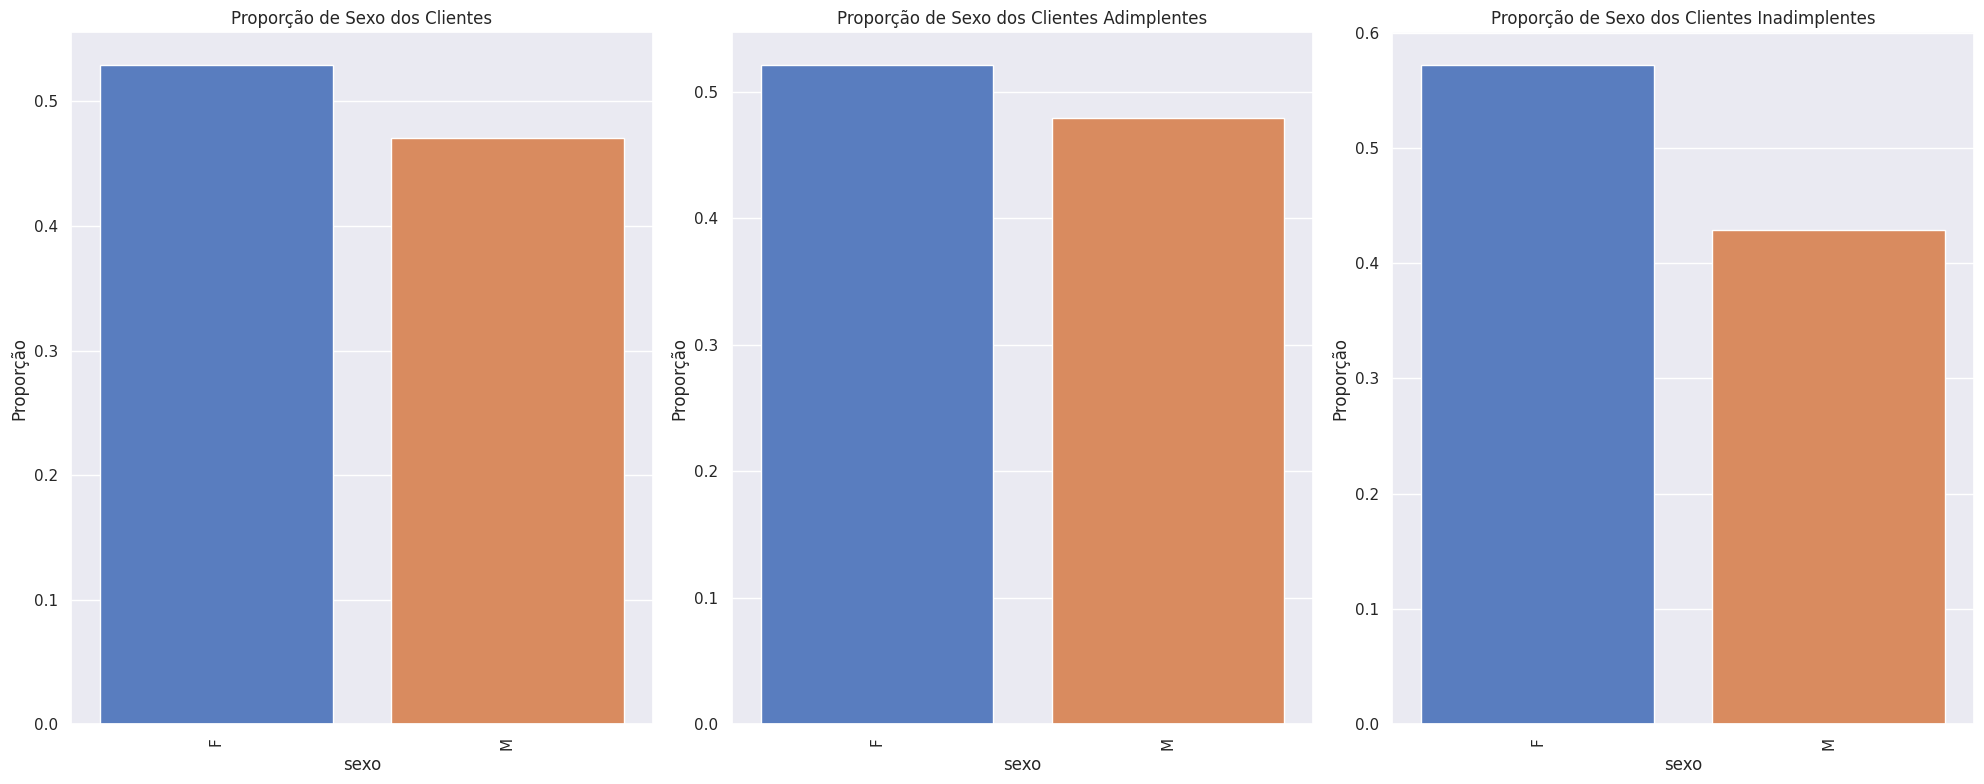

In [ ]:
plot_proporcao_variavel_cat('sexo')

<p align='justify'> A análise da variável <b><code>sexo</code></b> observamos que a categoria <b>F (Feminino)</b> tem uma proporção ligeiramente maior do que a categoria <b>M (Masculino)</b> em todas as três distribuições. Essa predominância do sexo feminino se mantém tanto para clientes <b>adimplentes</b> quanto para <b>inadimplentes</b>, sem grandes variações entre os grupos.  
A similaridade nas proporções entre os clientes adimplentes e inadimplentes sugere que <b>o sexo pode não ser um fator determinante na inadimplência</b>. No entanto, para aprimorar a classificação dos indivíduos quanto ao default, é relevante investigar se essa variável possui alguma influência significativa dentro do modelo preditivo.</p>

----

> **Visualizações Numéricas**

- Criando a função para variávies numéricas

In [ ]:
def plot_histograma_variavel(variavel):
    """
    Função para plotar histogramas de uma variável numérica específica
    para clientes adimplentes e inadimplentes.

    Parâmetros:
    df (DataFrame): DataFrame contendo os dados dos clientes.
    variavel (str): Nome da variável numérica que será analisada.
    default_col (str): Nome da coluna que indica adimplência/inadimplência. Padrão é 'default'.
    """
    # Filtrando os dados dos clientes adimplentes e inadimplentes
    df_adimplente = df[df['default'] == 0]
    df_inadimplente = df[df['default'] == 1]

    # Títulos para os gráficos
    titulos = [
        f'Histograma de {variavel.capitalize()} dos Clientes',
        f'Histograma de {variavel.capitalize()} dos Clientes Adimplentes',
        f'Histograma de {variavel.capitalize()} dos Clientes Inadimplentes'
    ]

    # Criando o layout para os subgráficos (1 linha, 3 colunas)
    figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
    sns.set_theme(style='darkgrid')

    # Lista de DataFrames para iteração
    dataframes = [df, df_adimplente, df_inadimplente]

    # Gerando os gráficos para cada grupo
    for eixo, (dataframe, titulo) in enumerate(zip(dataframes, titulos)):
        f = sns.histplot(x=variavel, data=dataframe, stat='count', ax=eixos[eixo])
        f.set(title=titulo, xlabel=variavel.capitalize(), ylabel='Frequência Absoluta')

    # Melhorando o layout
    plt.tight_layout()
    plt.show()



 - Grafico **`meses_de_relacionamento por default`**

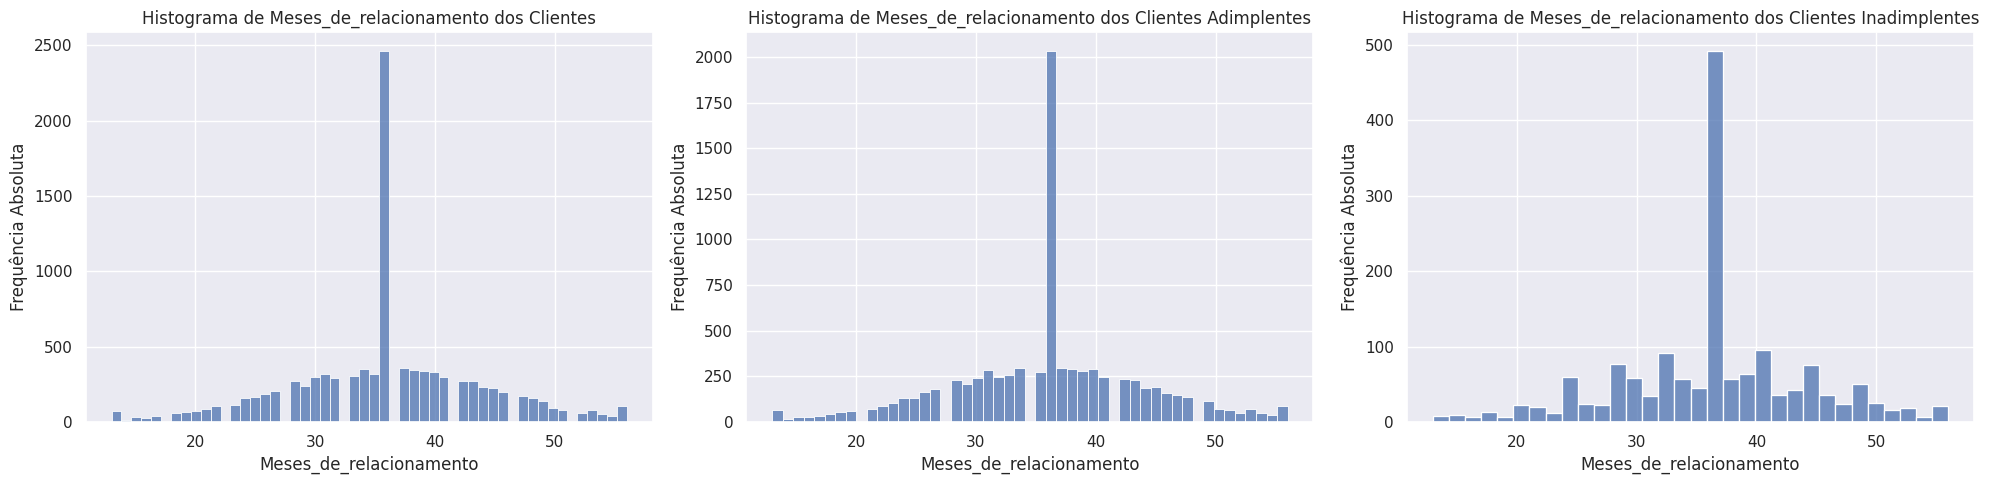

In [ ]:
plot_histograma_variavel('meses_de_relacionamento')

<p align ="justify">A maioria dos clientes tem entre <b>30 e 40 meses</b> de relacionamento. Existe um <b>pico bem acentuado no  valor de 36 meses</b>, indicando uma possível data ou campanha que atraiu muitos clientes de uma só vez ou que os dados foram imputados com um valor fixo. A distibuição entre adimplentes e inadimplentes são muito similares ao gráfico geral, contudo a distribuição dos meses de relacionamento dos inadimplentes é mais espalhada e não tão concentrada quanto aos dos adimplentes. Isso pode indicar uma maior variabilidade no tempo de relacionamento entre os inadimplentes. Contudo teremos que investigar mais afundo se esta variável pode ter influência na inadimplência</p>

 - Grafico **`iteracoes_12m por default`**

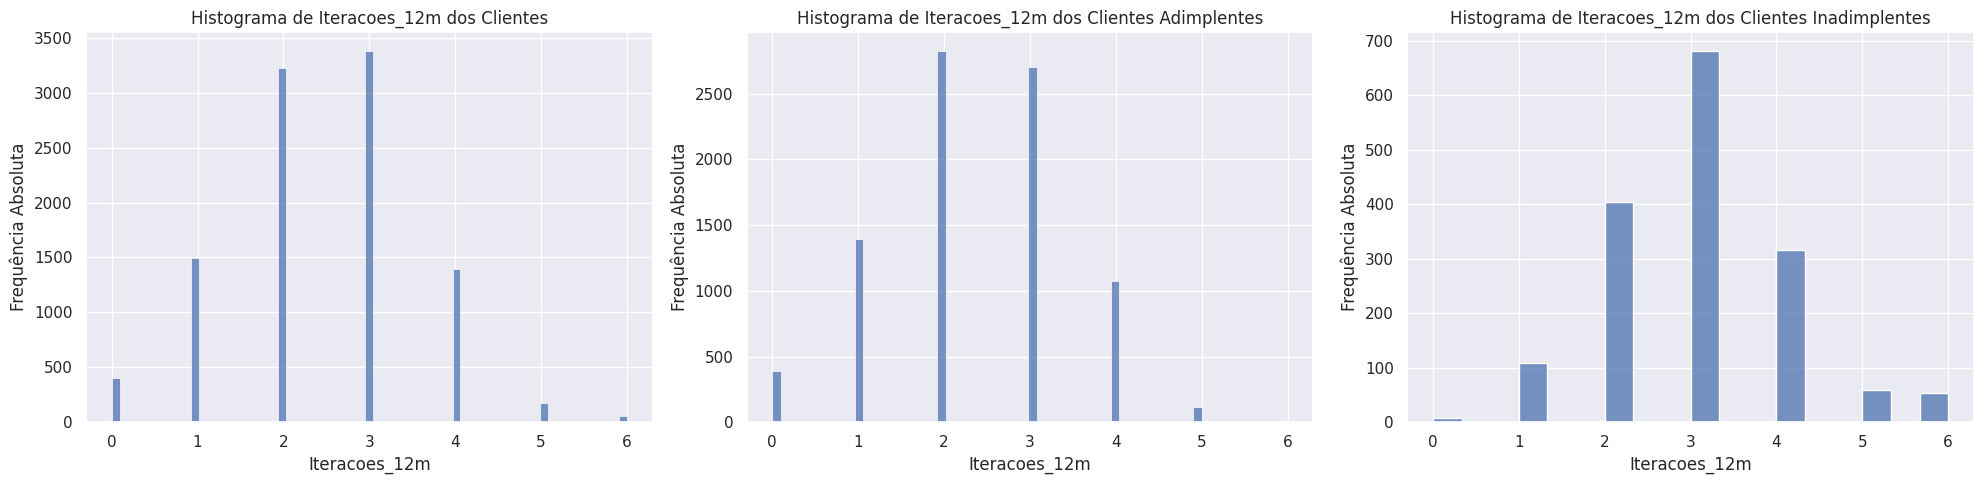

In [ ]:
plot_histograma_variavel('iteracoes_12m')

<p align='justify'> A análise do número de iterações ao longo de 12 meses nos mostrou que clientes inadimplentes tendem a ter mais iterações nos últimos 12 meses. Isso pode indicar que esses clientes estão interagindo mais com a empresa para resolver problemas de pagamento ou buscar renegociação de dívidas. Enquanto que clientes adimplentes geralmente têm menos iterações. Isso pode sugerir que eles estão satisfeitos com os serviços e não precisam entrar em contato com a empresa com tanta frequência. Apesar de possuirem um número de iterações semlehante (de 2 a 3) por ano, os clientes inadimplentes possuem uma maior frequência de iterações com a instituição financeira.  Podendo estar ligada à inadimplência.</p>

 - Grafico **`qtd_produtos por default`**

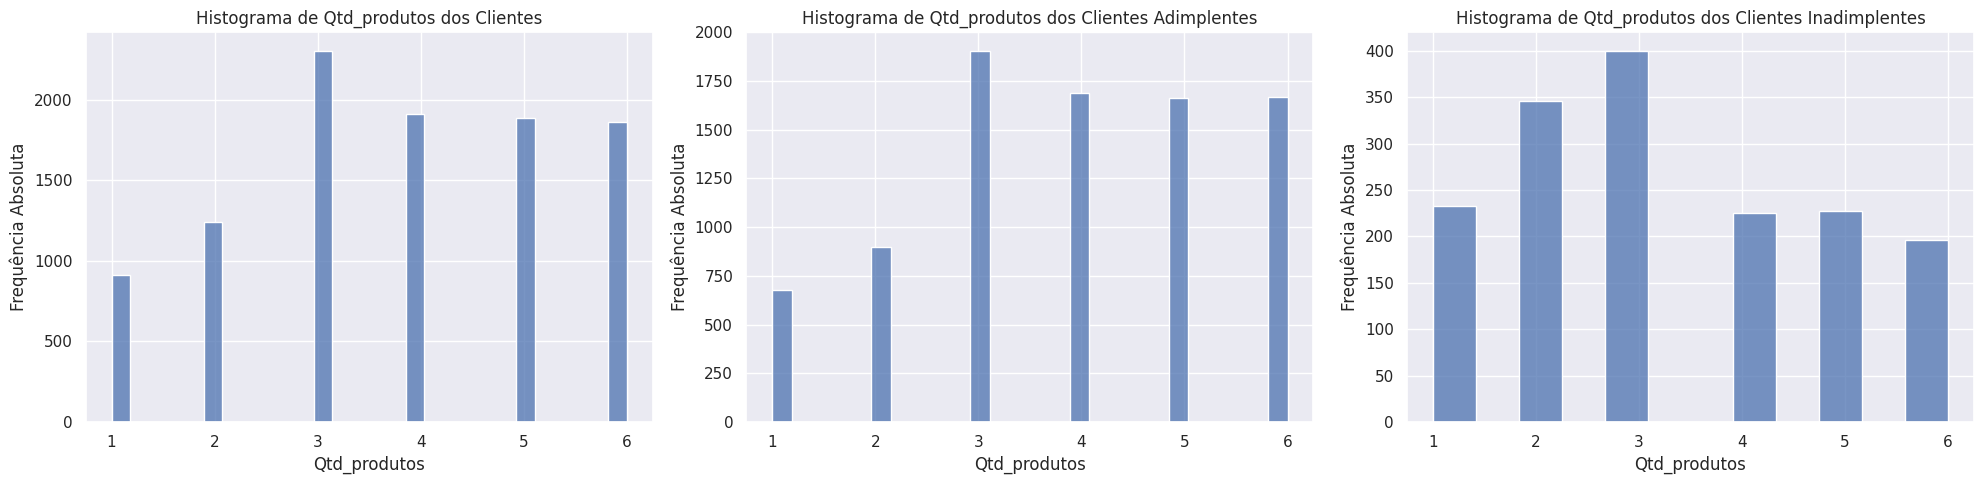

In [ ]:
plot_histograma_variavel('qtd_produtos')


<p align="justify">A análise da variável  <b>"qtd_produtos" (quantidade de produtos)</b> apresenta a distribuição geral da quantidade de produtos comprados por todos os clientes, sem distinção entre adimplentes e inadimplentes. Em geral a distribuição dos clientes desta instituição financeira parece possuir uma  distribuição relativamente uniforme, com uma leve tendência de aumento na frequência para quantidades maiores de produtos (a maioria dos clientes compra entre 1 e 5 produtos).</p>

<p align="justify">Não há uma diferença drástica na quantidade de produtos comprados entre clientes adimplentes e inadimplentes. Ambos os grupos tendem a comprar uma variedade de quantidades de produtos. Desta forma teríamos que investigar mais a fundo para verificarmos se esta variável influencia na inadimplência ou não.<p>

 - Grafico **`dependentes por default`**


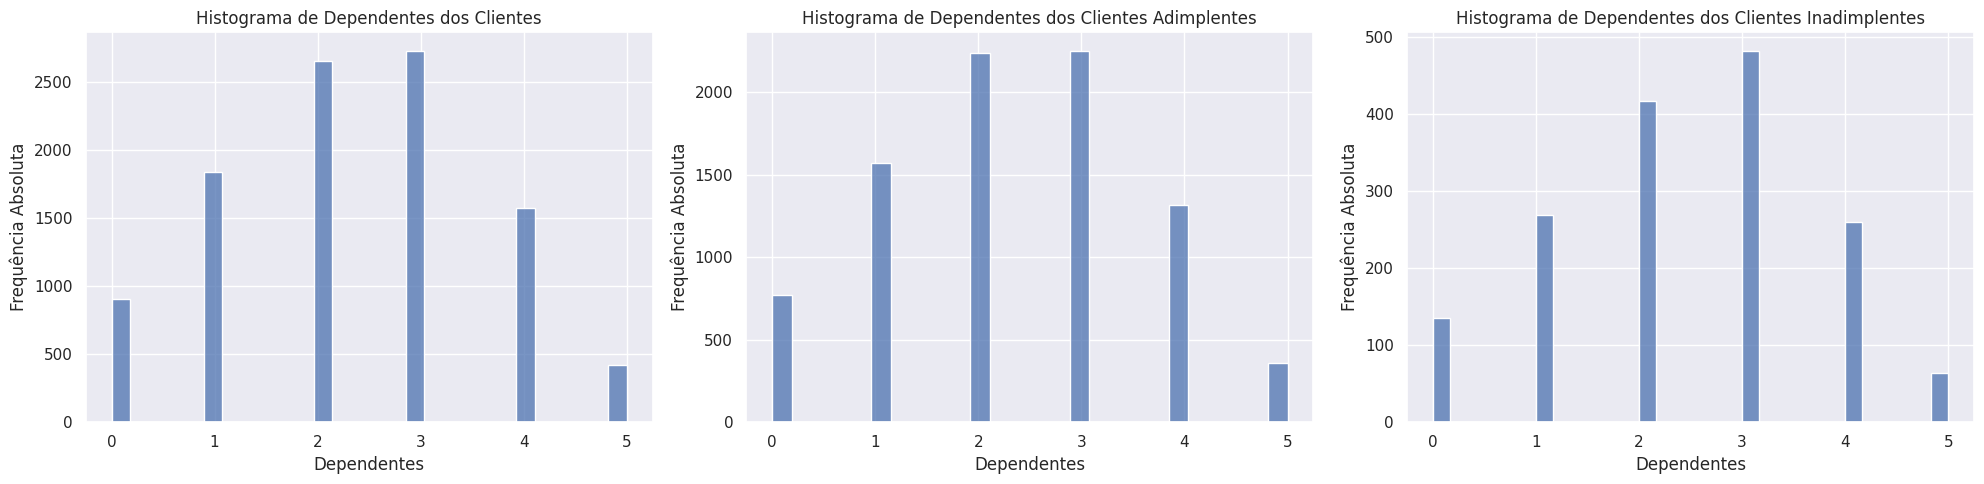

In [ ]:
plot_histograma_variavel('dependentes')

<p align='justify'>A análise da distribuição de <b><code>dependentes</b></code> mostra uma distribuição semelhante entre clientes adimplentes e clientes inadimplentes. A similaridade nas proporções entre os clientes adimplentes e inadimplentes sugere que o <b>número de dependentes pode não ser um fator determinante na inadimplência.</b></p>


 - Grafico **`idade por default`**


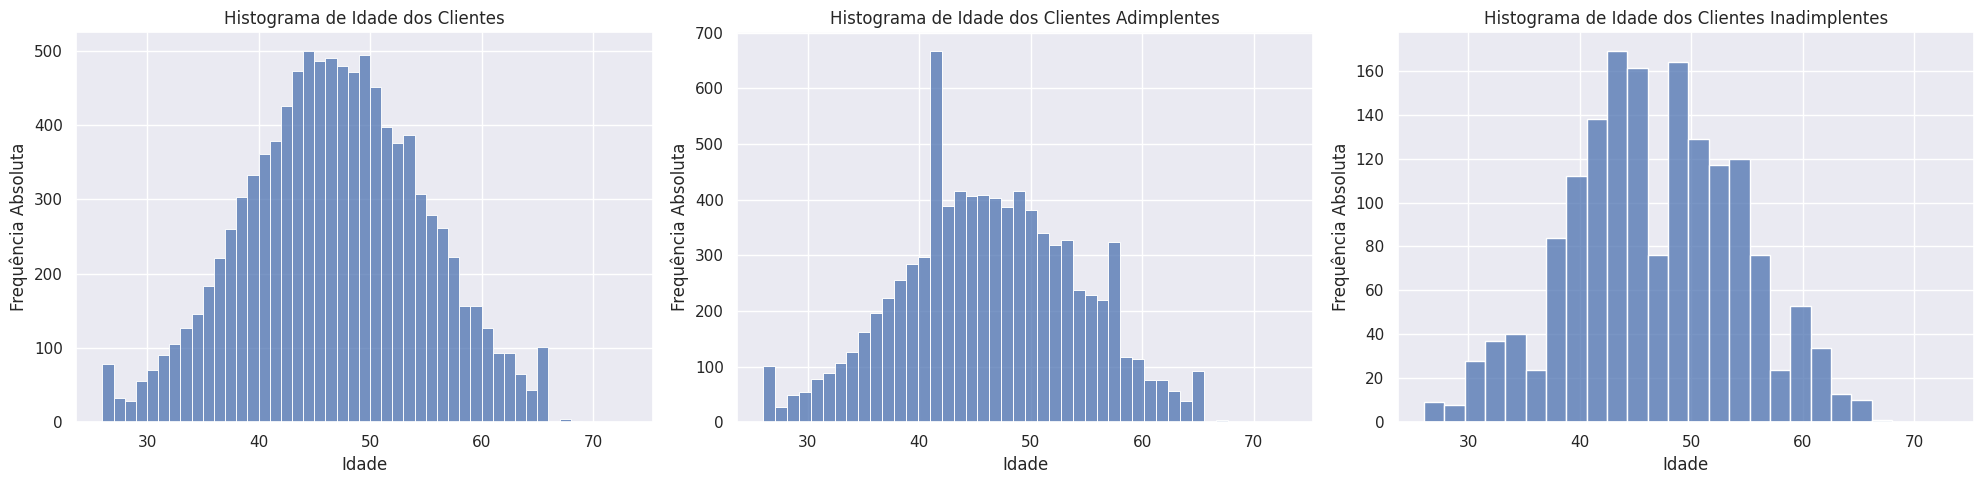

In [ ]:
plot_histograma_variavel('idade')

<p align ="justify">A análise comparativa dos histogramas da variável <code><b>idade</code></b> demonstra que, embora a faixa etária de 40 a 50 anos concentre o maior número de clientes em ambos os grupos (adimplentes e inadimplentes), observa-se uma tendência significativa de maior incidência de inadimplência entre os clientes mais jovens, na faixa de 20 a 40 anos. Em contrapartida, os clientes com idade superior a 50 anos parecem exibir uma maior propensão à adimplência. Essa correlação entre idade e comportamento de pagamento é uma informação crucial para o desenvolvimento de modelos preditivos de inadimplência e para a formulação de políticas de crédito mais eficazes e segmentadas. Portanto, a idade pode ser considerada como um fator relevante e influente na predição da inadimplência.</p>

 - Grafico **`limite_credito por default`**

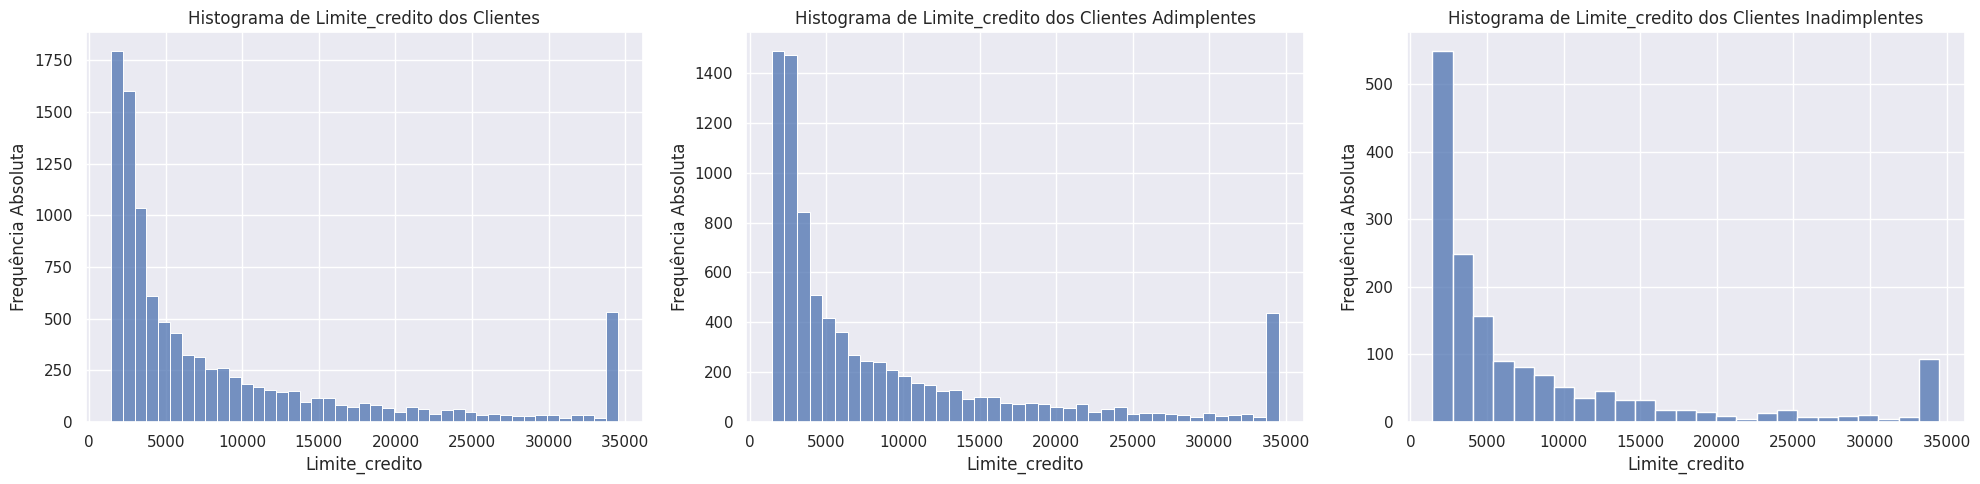

In [ ]:
plot_histograma_variavel('limite_credito')

<p align = 'justify'>  A análise da distribuição do <b><code>limite de crédito</b></code> tem um formato assimétrico à direita, ou seja, a maioria dos clientes possui limites menores, enquanto poucos possuem valores elevados.O mesmo padrão é observado tanto para clientes <b>adimplentes</b> quanto <b>inadimplentes</b>, indicando que o limite de crédito não difere drasticamente entre os grupos. Há um pico no limite máximo, possivelmente devido a um valor fixo oferecido a um grupo específico de clientes, porém parece ter um comportamento semelhante entre os grupos, sugerindo que pode não ser um fator isolado na inadimplência.  

----

 - Grafico **`valor_transacoes_12m por default`**

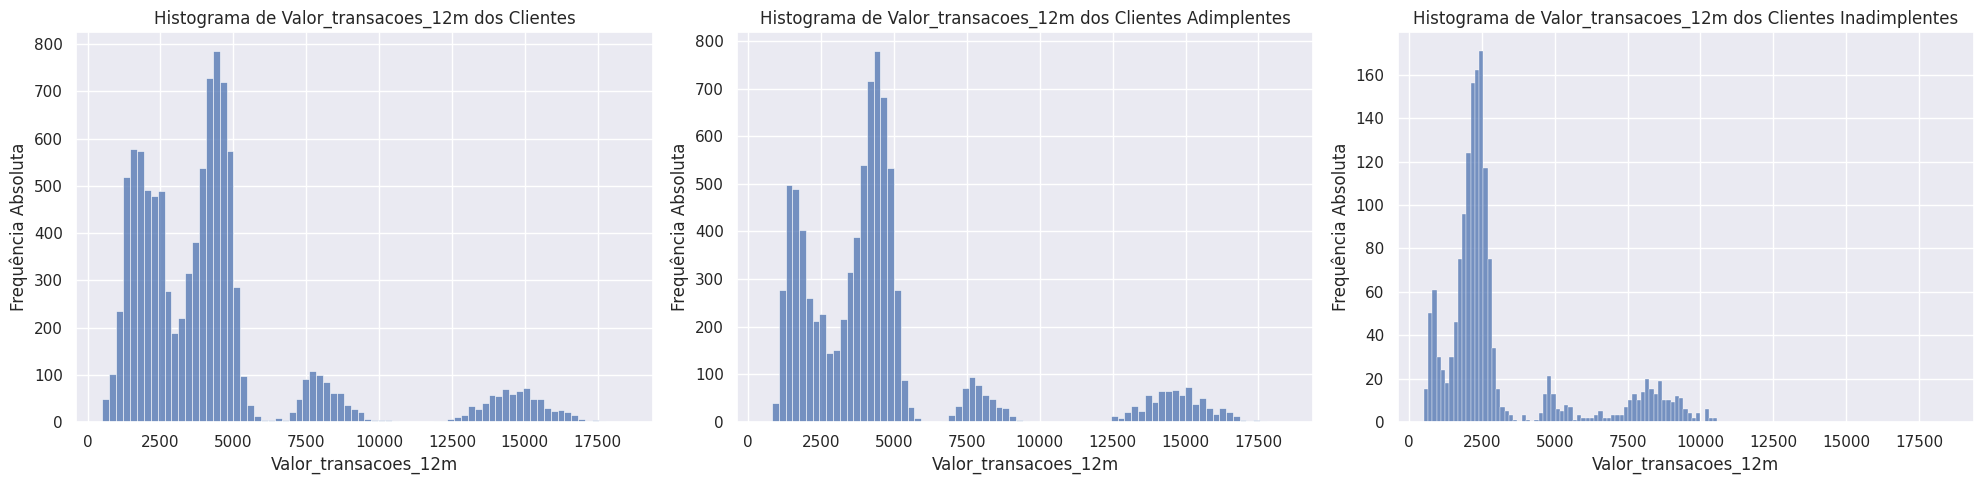

In [ ]:
plot_histograma_variavel('valor_transacoes_12m')

<p align =  'justify'>A distribuição do <b><code>valor das transações nos últimos 12 meses</code></b> apresenta múltiplos picos, sugerindo que os valores das transações seguem diferentes faixas de comportamento. Os clientes adimplentes e inadimplentes apresentam padrões semelhantes, mas os inadimplentes parecem ter uma frequência ligeiramente em valores mais baixos do que comparados aos adimplentes. Enquanto o pico dos adimplentes se localiza no 5000, o pico dos inadimplentes se localiza nos 2.500, metade do valor dos adimplentes. Isso pode indicar que clientes inadimplentes realizam menos transações ou transações de menor valor. O que pode indicar diferenças mais relevantes entre adimplentes e inadimplentes, podendo ser considerada uma importante variável para um modelo de classificação.</p>

---

 - Grafico **`qtd_transacoes_12m por default`**

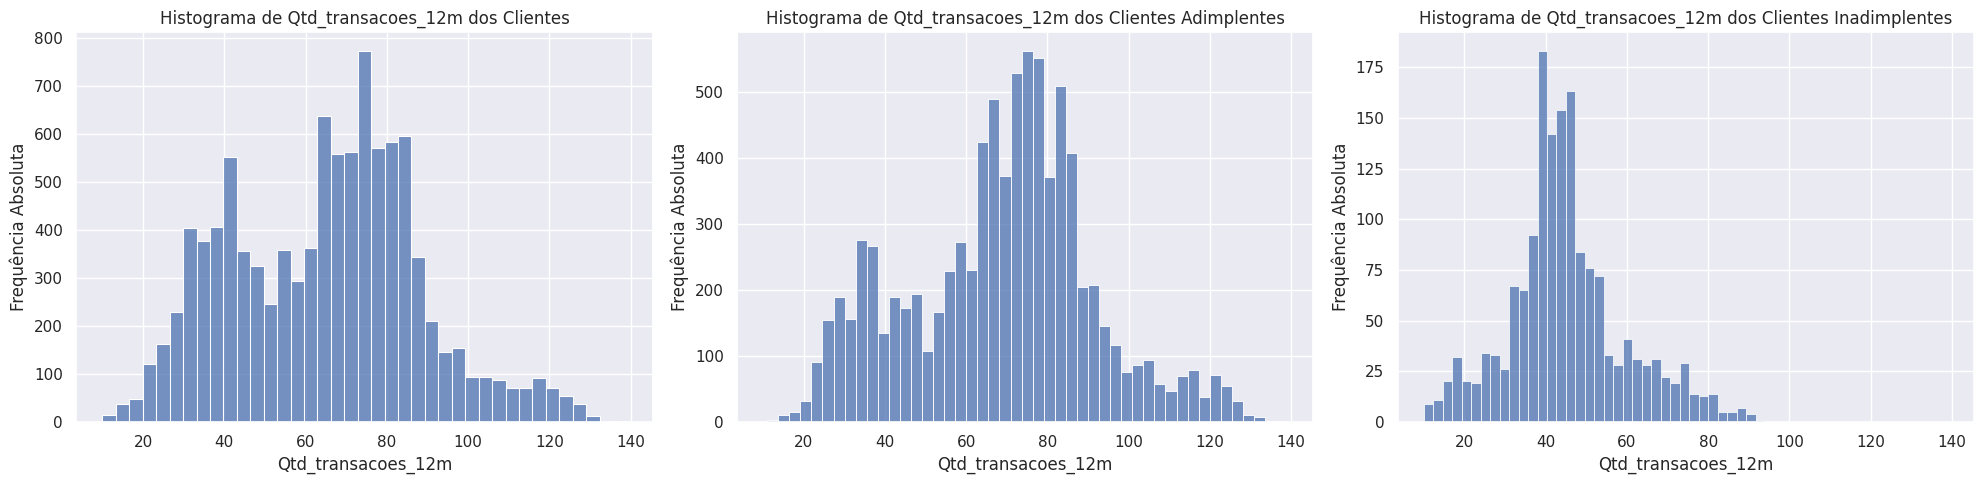

In [ ]:
plot_histograma_variavel('qtd_transacoes_12m')

<p align='justify'>
Assim como observado no valor das transações, a <b><code>quantidade de transações realizadas nos últimos 12 meses</code></b> também revela comportamentos distintos entre clientes adimplentes e inadimplentes. Clientes adimplentes apresentam um pico de movimentação em torno de 80 transações anuais, enquanto o pico entre os inadimplentes gira em torno de 40 — ou seja, praticamente a metade. Essa diferença evidencia que a frequência de transações pode ser um fator relevante na distinção entre os dois grupos. Podemos, portanto, inferir que clientes mais ativos, que realizam um maior número de transações ao longo do ano, tendem a ser melhores pagadores. Dessa forma, a variável <b><code>qtd_transacoes_12m</code></b> se destaca como um dos atributos mais importantes para o modelo de classificação de adimplência.
</p>

---

- Valor de Transações nos Últimos 12 Meses x Quantidade de Transações nos Últimos 12 Meses

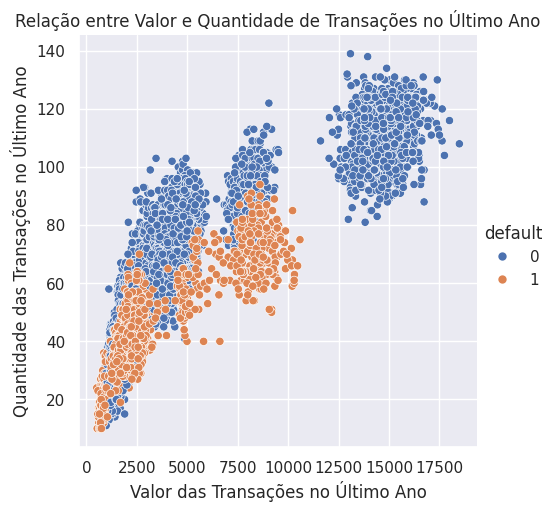

In [ ]:
f = sns.relplot(x='valor_transacoes_12m', #coluna pro eixo X
                y='qtd_transacoes_12m',   #coluna pro eixo Y
                data=df,                  #dataframe
                hue='default')            #variavel categórica que diferencia por cor

#Ajusta os titulos
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano',
    xlabel='Valor das Transações no Último Ano',
    ylabel='Quantidade das Transações no Último Ano'
  )

O gráfico que relaciona o **Valor das Transações nos Últimos 12 Meses** com a **Quantidade de Transações nos Últimos 12 Meses** mostra que clientes **adimplentes** tendem a realizar transações de menor valor e em menor quantidade quando comparados aos **inadimplentes**.

Observamos que:
- O número de transações anuais varia entre **20 e 80** para os **adimplentes** e entre **20 e 140** para os **inadimplentes**.
- O valor total das transações nos últimos 12 meses situa-se entre **2.500 e 10.000** para os **adimplentes**, enquanto para os **inadimplentes** varia de **2.500 a 17.500**.

Essas diferenças sugerem que essas variáveis podem desempenhar um papel importante no modelo de classificação de risco de crédito.


<p align='justify'>A análise do conjunto de dados revelou que as variáveis <b>tipo_cartão, salário_anual, estado_civil e escolaridade</b> não apresentaram relevância para determinar a inadimplência de um cliente. Por outro lado, as variáveis <b>quantidade de transações nos últimos 12 meses e limite de crédito</b> mostraram-se eficazes, indicando que clientes com maior quantidade de transações anuais — entre <b>2.500 e 5.000</b> — e limites de crédito mais elevados demonstraram maior capacidade de honrar seus compromissos, ou seja, são predominantemente <b>adimplentes</b>. Outras variáveis como <b> valor_transacoes_12m, idade, sexo e iteracoes12m</b> também apresentaram certa influência na inadimplência, por isso iremos investigá-las.</p>

---

#### **Correlação Linear**<a name="correlacao"></a>

<p align='justify'>Após a análise das variáveis em relação à inadimplência, o próximo passo será investigar a <b>correlação entre as variáveis do conjunto de dados</b>. Como o método <code>.corr()</code> calcula a correlação apenas entre variáveis numéricas, será necessário, antes disso, <b>transformar as variáveis categóricas em variáveis numéricas</b>. Para isso, utilizaremos o <code>LabelEncoder</code>, que atribui um valor numérico para cada categoria.</p>

<p align='justify'>Com todas as variáveis devidamente codificadas, aplicaremos o método <code>.corr()</code> para gerar a <b>matriz de correlação de Pearson</b>, que permite identificar relações lineares entre os atributos. Em seguida, essa matriz será visualizada por meio de um <b>heatmap</b>, facilitando a interpretação gráfica das correlações. Essa etapa é fundamental para detectar <b>variáveis fortemente correlacionadas entre si</b> — o que pode indicar redundância — e também para analisar o <b>grau de associação com a variável alvo</b>, contribuindo para uma seleção mais criteriosa das variáveis na etapa de modelagem preditiva.</p>

[Voltar ao índice](#Contents)

- Transformando as variáveis categóricas em variáveis numéricas

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Criando o LabelEncoder
label_encoder = LabelEncoder()
for col in ['sexo', 'escolaridade', 'estado_civil', 'tipo_cartao', 'salario_anual']:
    df[col] = label_encoder.fit_transform(df[col])

df.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,1,3,1,0,2,0,39,5,3,1,12691.51,1144.90,42
1,818770008,0,49,0,5,3,3,4,0,44,6,2,1,8256.96,1291.45,33
2,713982108,0,51,1,3,3,0,3,0,36,4,0,1,3418.56,1887.72,20
3,769911858,0,40,0,4,1,2,4,0,34,3,1,4,3313.03,1171.56,20
4,709106358,0,40,1,3,5,0,2,0,21,5,0,1,4716.22,816.08,28


- Criando a <code><b>Matriz de Correlação</code></b>

In [ ]:
corr_matrix = df.corr()
corr_matrix

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
id,1.000000,-0.046430,0.007613,0.020188,0.006772,-0.000294,-0.003546,-0.025802,0.007511,0.134588,0.006907,0.005694,0.005729,0.005707,-0.019691,-0.002961
default,-0.046430,1.000000,0.018203,-0.037272,0.018991,-0.007537,0.023485,0.017584,-0.006038,0.013687,-0.150005,0.204491,0.152449,-0.023873,-0.168599,-0.371403
idade,0.007613,0.018203,1.000000,-0.017312,-0.122254,0.005159,-0.029830,-0.013474,-0.020131,0.788912,-0.010931,-0.018452,0.054361,0.002476,-0.046447,-0.067097
sexo,0.020188,-0.037272,-0.017312,1.000000,0.004563,-0.010234,-0.012802,-0.539731,0.079203,-0.006728,0.003157,0.039987,-0.011163,0.420807,0.024890,-0.067454
dependentes,0.006772,0.018991,-0.122254,0.004563,1.000000,0.005591,-0.025793,-0.035417,0.021674,-0.103062,-0.039076,-0.040505,-0.010768,0.068064,0.025045,0.049912
escolaridade,-0.000294,-0.007537,0.005159,-0.010234,0.005591,1.000000,0.011483,0.007875,0.002295,-0.002228,0.004862,0.013116,0.005579,0.004044,0.009951,0.007991
estado_civil,-0.003546,0.023485,-0.029830,-0.012802,-0.025793,0.011483,1.000000,0.013996,0.046120,-0.020330,-0.019969,0.003229,0.007858,0.047649,0.058816,0.118493
salario_anual,-0.025802,0.017584,-0.013474,-0.539731,-0.035417,0.007875,0.013996,1.000000,-0.051632,-0.016375,0.008138,-0.018367,0.024037,-0.225394,-0.014686,0.033498
tipo_cartao,0.007511,-0.006038,-0.020131,0.079203,0.021674,0.002295,0.046120,-0.051632,1.000000,-0.014749,-0.073770,-0.000919,-0.016816,0.484090,0.176376,0.116579
meses_de_relacionamento,0.134588,0.013687,0.788912,-0.006728,-0.103062,-0.002228,-0.020330,-0.016375,-0.014749,1.000000,-0.009203,-0.010774,0.074164,0.007507,-0.038591,-0.049819


- Visualizando a <code><b>Matriz de Correlação</code></b> com o Heatmap

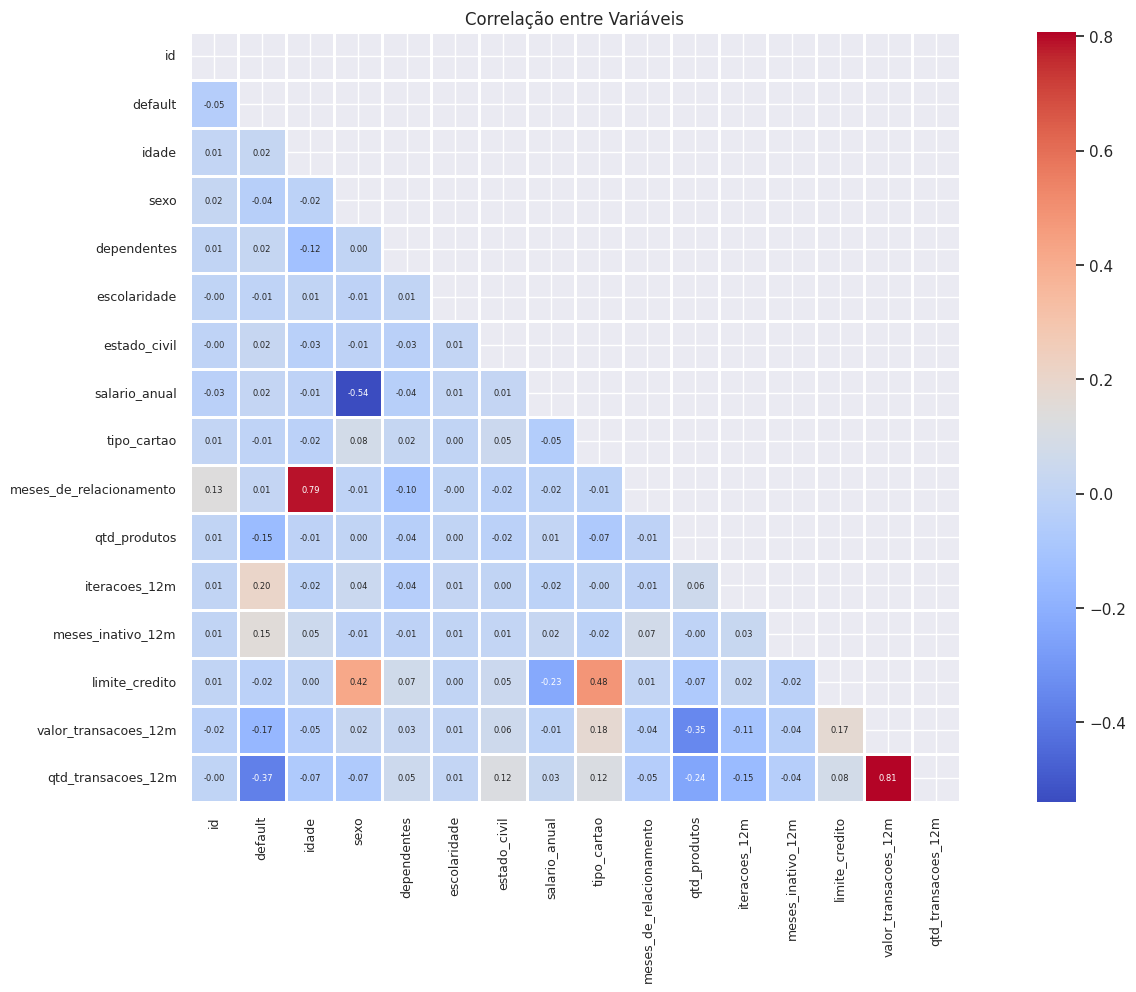

In [ ]:
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(20,10))

# Plotando o heatmap com personalizações
sns.heatmap(corr_matrix,
            mask=mask,
            annot=True,
            fmt='.2f',  # Formatando os números com duas casas decimais
            cmap= "coolwarm",
            square=True,
            linewidths=2,
            cbar_kws={"shrink": 1},  # Reduzindo o tamanho da barra de cores
            annot_kws={"size": 6})  # Aumentando o tamanho da fonte das anotações

# Rotulando os eixos com fontes maiores
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.title("Correlação entre Variáveis")
plt.show()

Após a análise aparentemente nenhuma variável possui relação significativa com a variável `default`, teremos que avaliar de outras maneiras para saber como elas influenciam a variável alvo.

## Pré-Processamento <a name=pre_processamento></a>

<p align="justify">Nesta etapa do projeto, será realizada a <b>preparação dos dados</b>, etapa essencial para garantir a qualidade e a confiabilidade dos resultados obtidos durante a modelagem.</p> <p align="justify">Primeiramente, aplicaremos a <b>normalização das variáveis numéricas</b>, a fim de padronizar suas escalas e evitar que atributos com magnitudes diferentes influenciem desproporcionalmente o modelo.</p> <p align="justify">Em seguida, os dados serão organizados em duas partes: a variável <b>alvo (<code>y</code>)</b>, que representa a inadimplência, e as <b>variáveis explicativas (<code>X</code>)</b>, responsáveis por prever esse comportamento.</p> <p align="justify">Por fim, o conjunto de dados será dividido em <b>conjuntos de treino e teste</b>, garantindo que o modelo possa ser avaliado de forma justa, utilizando dados que ele ainda não viu durante o treinamento.</p>

[Voltar ao índice](#Contents)

### Normalização<a name="normalicao"></a>
<div style="text-align: right"

[Voltar ao índice](#Contents)

In [ ]:
# MinMaxScaler
scaler = MinMaxScaler()
df_esc= scaler.fit_transform(df)


# Converter o array de volta para DataFrame
df_esc = pd.DataFrame(df_esc, columns=df.columns, index=df.index)

df_esc.head()

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,0.504929,0.0,0.404255,1.0,0.6,0.2,0.000000,0.4,0.0,0.604651,0.8,0.500000,0.166667,0.340201,0.035313,0.248062
1,0.920398,0.0,0.489362,0.0,1.0,0.6,1.000000,0.8,0.0,0.720930,1.0,0.333333,0.166667,0.206142,0.043466,0.178295
2,0.049060,0.0,0.531915,1.0,0.6,0.6,0.000000,0.6,0.0,0.534884,0.6,0.000000,0.166667,0.059874,0.076639,0.077519
3,0.514130,0.0,0.297872,0.0,0.8,0.2,0.666667,0.8,0.0,0.488372,0.4,0.166667,0.666667,0.056683,0.036796,0.077519
4,0.008517,0.0,0.297872,1.0,0.6,1.0,0.000000,0.4,0.0,0.186047,0.8,0.000000,0.166667,0.099103,0.017019,0.139535


### Separação das Variáveis Alvo (y) e das Variáveis Preditoras (X)<a name="separacao"></a>
<div style="text-align: right"

[Voltar ao índice](#Contents)

- Variável y (Alvo)

In [ ]:
y = df_esc['default']
y

,default
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
10122,0.0
10123,1.0
10124,1.0
10125,1.0


- Variável X (Preditora)

In [ ]:
X = df.drop(columns=['default', 'id'])
X

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,1,3,1,0,2,0,39,5,3,1,12691.51,1144.90,42
1,49,0,5,3,3,4,0,44,6,2,1,8256.96,1291.45,33
2,51,1,3,3,0,3,0,36,4,0,1,3418.56,1887.72,20
3,40,0,4,1,2,4,0,34,3,1,4,3313.03,1171.56,20
4,40,1,3,5,0,2,0,21,5,0,1,4716.22,816.08,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,3,3,1,0,40,3,3,2,4003.91,15476.26,117
10123,41,1,2,4,1,1,0,25,4,3,2,4277.04,8764.88,69
10124,44,0,1,1,0,4,0,36,5,4,3,5409.16,10291.78,60
10125,30,1,2,3,2,1,0,36,4,3,3,5281.84,8395.62,62


### Separação dos Dados Em teino e teste <a name="treinoeteste"></a>
<div style="text-align: right"

[Voltar ao índice](#Contents)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
print('Quantidade de linhas e colunas de X_train (80%):',
      X_train.shape)
print('Quantidade de linhas e colunas de X_test (20%):',
      X_test.shape, '\n')

print('Quantidade de linhas de y_train (80%):',
      len(y_train))
print('Quantidade de linhas de y_test (20%):',
      len(y_test))

Quantidade de linhas e colunas de X_train (80%): (8101, 14)
Quantidade de linhas e colunas de X_test (20%): (2026, 14) 

Quantidade de linhas de y_train (80%): 8101
Quantidade de linhas de y_test (20%): 2026


## Modelagem <a name=modelagem></a>


<p align='justify'> Nesta etapa, realizaremos a modelagem do projeto. Inicialmente, testaremos diversos algoritmos de classificação com o objetivo de comparar o desempenho entre eles e selecionar aquele que apresentar os melhores resultados com base em métricas como acurácia, precisão, recall, F1-score e AUC.</p>

<p align='justify'>Em seguida, com o modelo escolhido, será realizado um processo de interpretação utilizando a técnica SHAP, a fim de identificar as variáveis mais relevantes para a previsão. A partir dessa análise, será construído um segundo modelo utilizando apenas as variáveis mais significativas, com o intuito de avaliar se a redução de dimensionalidade melhora ou mantém o desempenho.</p>

<p align='justify'>Na terceira etapa, será aplicado o processo de <b>otimização de hiperparâmetros</b> (via GridSearchCV), utilizando validação cruzada, para refinar ainda mais o modelo escolhido.</p>

<p align='justify'>Por fim, os três modelos — o modelo base, o modelo com variáveis selecionadas via SHAP e o modelo com hiperparâmetros otimizados — serão comparados entre si. O modelo que apresentar o melhor desempenho final será selecionado para ser salvo e utilizado em produção.</p>


[Voltar ao índice](#Contents)


### Testando Diferentes Algoritmos

In [ ]:
# Definindo os modelos com os hiperparâmetros especificados
modelos = {
    'GaussianNB': GaussianNB(),
    'LogisticRegression': LogisticRegression(C=1, max_iter=500, random_state=1, solver='liblinear', penalty='l1'),
    'KNeighborsClassifier': KNeighborsClassifier(metric='minkowski', n_neighbors=3, p=1),
    'DecisionTreeClassifier': DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=0),
    'RandomForestClassifier': RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=150, random_state=0),
    'XGBClassifier': XGBClassifier(max_depth=2, learning_rate=0.5, n_estimators=300, objective='binary:logistic', random_state=0)
}



# Lista para armazenar os resultados
resultados = []

# Iterando sobre cada modelo, treinando, fazendo predições e calculando as métricas
for nome, modelo in modelos.items():
    # Treinamento do modelo
    modelo.fit(X_train, y_train)

    # Predições no conjunto de treino e teste
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)

    # Se o modelo permitir previsão de probabilidades, utiliza para calcular AUC-ROC
    if hasattr(modelo, "predict_proba"):
        y_test_proba = modelo.predict_proba(X_test)[:, 1]
    else:
        y_test_proba = None

    # Cálculo das métricas
    acuracia_treino = accuracy_score(y_train, y_train_pred) * 100
    acuracia_teste = accuracy_score(y_test, y_test_pred) * 100

    # Validação cruzada no conjunto de treino (5 folds)
    cv_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='accuracy')
    validacao_cruzada = np.mean(cv_scores) * 100

    # Ajuste para a média dos scores binários. Caso os rótulos não sejam 0/1, pode ser necessário definir pos_label
    f1 = f1_score(y_test, y_test_pred, pos_label=np.unique(y)[1]) * 100
    precision = precision_score(y_test, y_test_pred, pos_label=np.unique(y)[1]) * 100
    recall = recall_score(y_test, y_test_pred, pos_label=np.unique(y)[1]) * 100

    if y_test_proba is not None:
        auc_roc = roc_auc_score(y_test, y_test_proba)
    else:
        auc_roc = np.nan

    # Coleta dos hiperparâmetros do modelo
    hiperparametros = modelo.get_params()

    resultados.append({
        'Modelo': nome,
        'Acurácia Treino': f'{acuracia_treino : .2f}%',
        'Acurácia Teste': f'{acuracia_teste : .2f}%',
        'Validação Cruzada': f'{validacao_cruzada : .2f}%',
        'F1 Score': f'{f1 : .2f}%',
        'Precision Score': f'{precision : .2f}%',
        'Recall Score': f'{recall : .2f}%',
        'AUC-ROC': f'{auc_roc : .2f}%',
        'Hiperparâmetros': hiperparametros
    })


In [ ]:
# Criando um DataFrame com os resultados
resultados_df = pd.DataFrame(resultados)

# Exibindo os resultados
resultados_df

,Modelo,Acurácia Treino,Acurácia Teste,Validação Cruzada,F1 Score,Precision Score,Recall Score,AUC-ROC,Hiperparâmetros
0,GaussianNB,85.83%,86.62%,85.62%,56.50%,56.05%,56.96%,0.83%,"{'priors': None, 'var_smoothing': 1e-09}"
1,LogisticRegression,87.62%,87.71%,87.57%,51.46%,64.71%,42.72%,0.90%,"{'C': 1, 'class_weight': None, 'dual': False, ..."
2,KNeighborsClassifier,92.67%,87.07%,86.11%,55.74%,58.30%,53.40%,0.82%,"{'algorithm': 'auto', 'leaf_size': 30, 'metric..."
3,DecisionTreeClassifier,93.28%,93.63%,92.14%,77.95%,82.61%,73.79%,0.95%,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
4,RandomForestClassifier,85.16%,85.93%,85.32%,14.93%,96.15%,8.09%,0.91%,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
5,XGBClassifier,97.58%,95.21%,94.64%,83.91%,86.05%,81.88%,0.98%,"{'objective': 'binary:logistic', 'base_score':..."


<p align='justify'>Para o projeto de <b>previsão de inadimplência</b>, optei pelo modelo <b>XGBoost Classifier</b> devido ao seu excelente desempenho nos testes e à sua capacidade de equilibrar <b>precisão e generalização</b>. Considerando que a base de dados apresenta um forte desbalanceamento entre as classes — <b>83,93% de clientes adimplentes</b> e <b>16,07% inadimplentes</b> — o XGBoost se mostrou uma escolha apropriada, pois é reconhecido por lidar eficientemente com esse tipo de cenário.</p>

<p align='justify'>Para aprimorar ainda mais a performance do modelo diante do desbalanceamento, foi adotado o ajuste do hiperparâmetro <code>scale_pos_weight</code>, que dá maior peso à classe minoritária (inadimplentes) durante o treinamento.</p>

<p align='justify'>O modelo atingiu uma <b>acurácia de 95.21% nos dados de teste</b>, <b>97.58% nos dados de treino</b> e <b>94.64% na validação cruzada</b>, evidenciando sua consistência e estabilidade. As métricas de avaliação também reforçam sua eficácia: <b>F1-Score: 83.91%</b>, <b>Precision: 86.05%</b>, <b>Recall: 81.88%</b> e <b>AUC-ROC: 98%</b>, o que indica uma excelente capacidade de discriminar corretamente entre clientes adimplentes e inadimplentes.</p>

<p align='justify'>Diante desses resultados, o <b>XGBoost Classifier</b> foi selecionado como o modelo final do projeto por oferecer <b>alta robustez e desempenho</b>, contribuindo diretamente para uma tomada de decisão mais assertiva e para a definição de estratégias eficazes de mitigação de risco.</p>


### Modelo 1

- Criando o Modelo

In [ ]:
classes = pd.Series(y).value_counts()
negativos = classes[0]
positivos = classes[1]

# Cálculo do scale_pos_weight
scale_pos_weight = negativos / positivos

print(f"Negativos (classe 0): {negativos}")
print(f"Positivos (classe 1): {positivos}")
print(f"scale_pos_weight ideal: {scale_pos_weight:.2f}")


Negativos (classe 0): 8500
Positivos (classe 1): 1627
scale_pos_weight ideal: 5.22


In [ ]:
# Criando o Modelo

model = XGBClassifier(max_depth=2, learning_rate=0.5, n_estimators=300, scale_pos_weight=scale_pos_weight, objective='binary:logistic', random_state=0)

- Treinando o Modelo

In [ ]:
# Treinando o modelo
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

- Base de Treino

In [ ]:
# Fazendo as predições na Base de Treino
y_pred = model.predict(X_train)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Calculando a Acurácia na Base de Treino
acc =  accuracy_score(y_pred, y_train)
print(f'Acurácia na base de treino:{acc*100 : .2f}%')

Acurácia na base de treino: 96.49%


In [ ]:
# Matriz de Confusão para Base de Treino
confusion_matrix(y_train, y_pred)

array([[6509,  274],
       [  10, 1308]])

In [ ]:
# Relatório de classificação dos Dados de Treino

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      6783
         1.0       0.83      0.99      0.90      1318

    accuracy                           0.96      8101
   macro avg       0.91      0.98      0.94      8101
weighted avg       0.97      0.96      0.97      8101



- Base de Teste

In [ ]:
# Fazendo as predições na Base de Treino
y_pred_test = model.predict(X_test)
y_pred_test

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
# Calculando a Acurácia na Base de Teste
acc_test = accuracy_score(y_pred_test, y_test)
print(f'Acurácia na base de teste:{acc_test*100 : .2f}%')

Acurácia na base de teste: 94.18%


In [ ]:
# Matriz de Confusão para Base de Treino
confusion_matrix(y_test, y_pred_test)

array([[1630,   87],
       [  31,  278]])

In [ ]:
# Relatório de classificação dos Dados de Teste

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1717
         1.0       0.76      0.90      0.82       309

    accuracy                           0.94      2026
   macro avg       0.87      0.92      0.89      2026
weighted avg       0.95      0.94      0.94      2026



- Validação Cruzada

In [ ]:
# Separando os dados em folds
kfold = KFold(n_splits = 30, shuffle=True, random_state = 0)

In [ ]:
# Criando o modelo
val_cruz = cross_val_score(modelo, X, y, cv = kfold)
val_cruz

array([0.95857988, 0.96153846, 0.94378698, 0.95266272, 0.95266272,
       0.95857988, 0.95857988, 0.94378698, 0.95857988, 0.9704142 ,
       0.9408284 , 0.94674556, 0.96449704, 0.95266272, 0.94970414,
       0.95266272, 0.96745562, 0.94362018, 0.95252226, 0.96439169,
       0.95252226, 0.95845697, 0.94362018, 0.95845697, 0.94658754,
       0.94658754, 0.9495549 , 0.95252226, 0.92284866, 0.92878338])

In [ ]:
# Usamos a média e o desvio padrão

print(f"O coeficiente de Validção Cruzada é: {((val_cruz).mean() * 100.0) : .2f}%")

O coeficiente de Validção Cruzada é:  95.18%


##### Avaliação do Modelo 1<a name=avaliacao_modelo></a>

<p align= "justify">

[Voltar ao índice](#Contents)


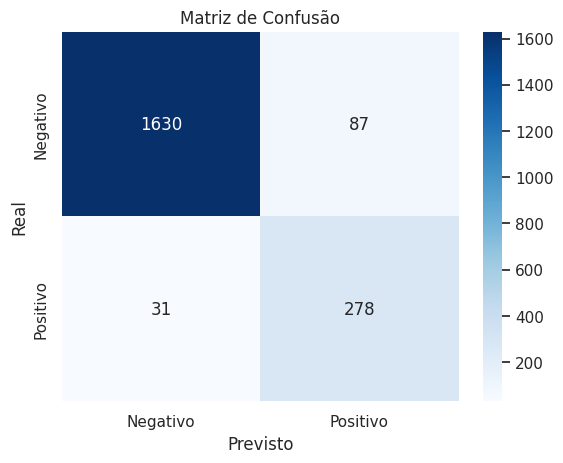

In [ ]:
# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negativo", "Positivo"], yticklabels=["Negativo", "Positivo"])
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

Ao analisar a Matriz de Confusão, obtivemos os seguintes resultados:

* <p align='justify'><b>Verdadeiros Negativos (VN)</b>: 1.630 observações foram corretamente identificadas como negativas, ou seja, clientes que não eram de risco (Negativo Real) e foram previstos como não sendo de risco (Negativo Previsto).</p>
* <p align='justify'><b>Falsos Positivos (FP)</b>: 87 observações foram incorretamente classificadas como positivas. Eram clientes que não eram de risco (Negativo Real), mas o modelo previu que seriam de risco (Positivo Previsto). No contexto de concessão de crédito, esse erro pode ser custoso, pois aprovar crédito para um potencial inadimplente pode gerar perdas financeiras para a empresa.</p>
* <p align='justify'> <b>Falsos Negativos(FN)</b>: 31 observações foram erroneamente classificadas como negativas. Eram clientes que eram de risco (Positivo Real), mas o modelo previu que não seriam de risco (Negativo Previsto). Negar crédito ou reduzir o limite para um cliente que efetivamente pagaria é uma consequência menos severa do que aprovar crédito para um inadimplente. Adicionalmente, o baixo número de falsos negativos sugere um impacto limitado desse tipo de erro.</p>
* <p align='justify'><b>Verdadeiros Positivos (VP)</b>: 278 observações foram corretamente identificadas como positivas, ou seja, clientes que eram de risco (Positivo Real) e foram previstos como sendo de risco (Positivo Previsto).</p>

<p align='justify'>O modelo de classificação demonstra um <b>bom desempenho geral</b>, evidenciado pelo baixo número de falsos positivos e falsos negativos. Essa característica sugere que o modelo possui boa precisão e confiabilidade em suas previsões, tornando-o promissor para aplicações sensíveis à acurácia, como a análise de risco de crédito.</p>

<p align='justify'>Em cenários de avaliação de inadimplência, é crucial reconhecer que tanto falsos positivos (rejeitar crédito a bons pagadores) quanto falsos negativos (aprovar crédito a maus pagadores) acarretam custos para a empresa. Falsos positivos podem resultar em perda de oportunidades de receita e insatisfação de clientes. No entanto, <b>falsos negativos geralmente representam um risco financeiro mais direto e potencialmente maior</b>, devido ao não pagamento das obrigações. A definição do ponto de equilíbrio ideal entre esses dois tipos de erro deve ser cuidadosamente estabelecida, alinhada com a tolerância ao risco e as políticas de crédito específicas do negócio.</p>

Com base nesta Matriz de Confusão, podemos proceder ao cálculo de diversas métricas de desempenho para uma avaliação quantitativa mais aprofundada do modelo:

In [ ]:
# Calcula a acurácia do modelo: percentual de previsões corretas sobre o total de amostras
accuracy = accuracy_score(y_test, y_pred_test) * 100
print(f'Acurácia: {accuracy:.2f}%')

# Calcula a precisão: entre as amostras classificadas como positivas, quantas realmente são positivas?
precision = precision_score(y_test, y_pred_test) * 100
print(f'Precisão: {precision:.2f}%')

# Calcula o recall (sensibilidade): entre os positivos reais, quantos foram corretamente identificados?
recall = recall_score(y_test, y_pred_test) * 100
print(f'Recall: {recall:.2f}%')

# Calcula o F1-Score: média harmônica entre precisão e recall, útil para dados desbalanceados
f1 = f1_score(y_test, y_pred_test) * 100
print(f'F1-Score: {f1:.2f}%')

# Calcula a AUC-ROC: mede a separabilidade entre classes (quanto maior, melhor)
auc = roc_auc_score(y_test, y_pred_test) * 100
print(f'AUC-ROC: {auc:.2f}%')


Acurácia: 94.18%
Precisão: 76.16%
Recall: 89.97%
F1-Score: 82.49%
AUC-ROC: 92.45%


O modelo tem uma alta **acurácia (94.18%**), o que significa que ele classifica corretamente a maioria das observações.

**A precisão (76.16%)** indica que, quando o modelo prevê a classe positiva, ele está correto em 76.16% das vezes.

**O recall (89.97%)** indica que o modelo consegue identificar 89.97% de todas as observações positivas reais.

**O F1-Score (82.49%)** é uma média harmônica entre precisão e recall, e indica um bom equilíbrio entre essas duas métricas.

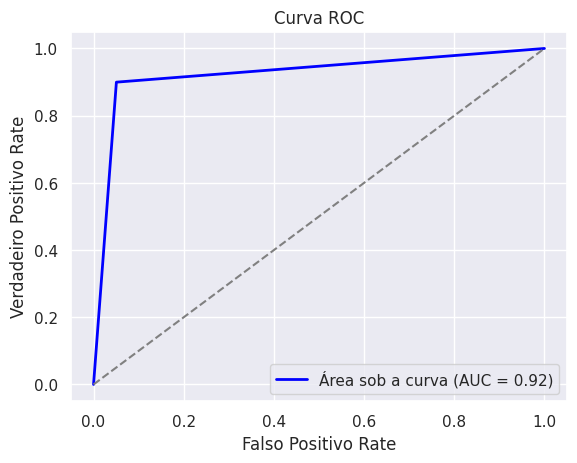

In [ ]:
# Curva ROC
from sklearn.metrics import roc_curve, auc # Import the roc_curve and auc functions

fpr, tpr, _ = roc_curve(y_test, y_pred_test)
# using sklearn_auc to call function for calculating area under curve
roc_auc = auc(fpr, tpr) # Use auc instead of sklearn_auc

# Plot da Curva ROC
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Área sob a curva (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Falso Positivo Rate")
plt.ylabel("Verdadeiro Positivo Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

A AUC de 0.92 é muito alta, o que significa que o modelo é altamente eficaz na classificação dos dados, ou seja, ele consegue identificar corretamente a maioria dos casos positivos e negativos.


#### **SHAP**

Nesta etapa do projeto, vamos analisar como cada variável utilizada no modelo influencia as previsões de adimplência, por meio de um gráfico do tipo **Beeswarm**, gerado com a biblioteca SHAP. Esse gráfico é uma ferramenta poderosa de interpretação, que permite compreender o impacto de cada variável nas decisões do modelo, cliente por cliente.
</p>

<p align='justify'>
Cada ponto no gráfico representa um cliente da base de dados. O posicionamento horizontal indica o grau de influência da variável na predição final do modelo: pontos à direita (com valores SHAP positivos) indicam que aquela variável contribuiu para a previsão de <b>adimplência</b>, enquanto pontos à esquerda (com valores SHAP negativos) indicam contribuição para a previsão de <b>inadimplência</b>. As cores representam os valores das variáveis — em geral,  rosa para valores altos e  azul para valores baixos.
</p>

<p align='justify'>
A análise desses impactos traz diversas vantagens importantes para o projeto. Em primeiro lugar, ela <b>aumenta a confiança no modelo</b>, pois torna mais claro como o algoritmo chega às suas decisões, o que é essencial para a transparência e a aceitação por parte dos stakeholders, como o time de negócios ou mesmo o cliente final.
</p>

<p align='justify'>
Além disso, ela reforça o <b>alinhamento com o domínio bancário</b>, já que as variáveis mais influentes — como quantidade e valor de transações, meses inativos e limite de crédito — fazem sentido dentro da lógica financeira, mostrando que o modelo está não apenas performando bem, mas também sendo coerente com a realidade operacional da instituição.
</p>

<p align='justify'>
Por fim, essa etapa também serve como base para a <b>tomada de decisão estratégica</b>. A partir desses insights, é possível, por exemplo, refinar os critérios de concessão de crédito, apoiar ações de CRM, retenção ou cobrança, e até mesmo priorizar perfis com maior sinal de risco. Ou seja, a explicação do modelo com SHAP não apenas complementa a análise de performance, como também gera valor direto para o negócio, indo além da métrica de acurácia.
</p>


 94%|=================== | 1913/2026 [00:14<00:00]       

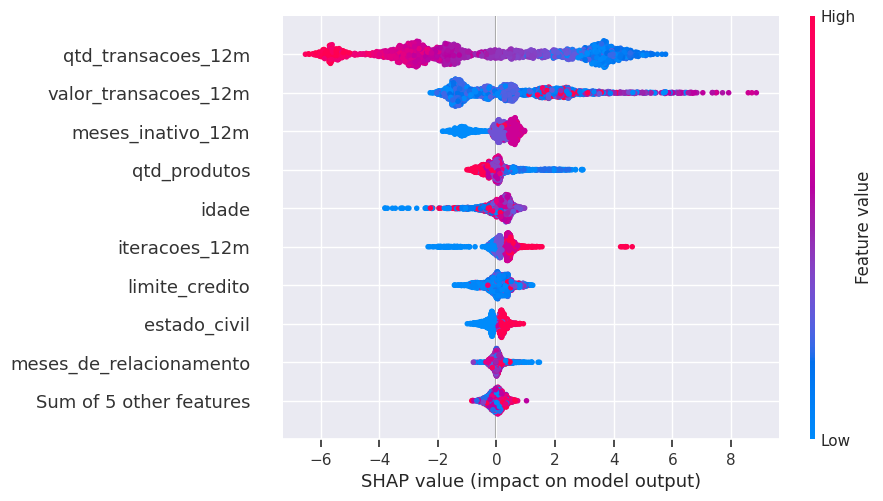

In [ ]:
#  Criando o explainer SHAP
explainer = shap.Explainer(model, X_train)

#  Calculando os valores shap
shap_values = explainer(X_test)

# Visualizando a importância global
shap.plots.beeswarm(shap_values)


#### **Interpretação do Modelo com SHAP**

#### <b>Quantidade de transações em 12 meses</b>
<p align="justify"> A quantidade de transações em 12 meses é a variável com maior impacto global no modelo. No gráfico, observamos que valores altos (rosa) estão associados a valores SHAP negativos (a esquerda do gráfico), indicando maior probabilidade de inadimplência. Embora um alto número de transações possa inicialmente parecer um sinal de engajamento, o modelo indica que  <code>clientes com um grande número de transações nos últimos 12 meses tendem a apresentar maior risco de inadimplência</code>. Isso pode refletir um <b>comportamento impulsivo ou uso excessivo do crédito</b>.</p>

**Possíveis Ações:**

- **Análise comportamental mais refinada**, diferenciando transações essenciais de supérfluas.
- **Ajuste de limites de crédito**, com base na média de valor por transação, e não apenas na quantidade.
- **Campanhas de educação financeira** voltadas a clientes com alto número de transações e histórico de risco.

---

#### <b>Valor de transações em 12 meses</b>
<p align="justify"><b>O valor total das transações em 12 meses</b> também apresenta alta relevância para o modelo. Neste caso, valores altos (rosa) estão concentrados à direita (valores SHAP positivos), sinalizando uma associação com adimplência. Ou seja, clientes que movimentam valores maiores têm maior probabilidade de serem adimplentes, enquanto valores baixos de movimentação estão ligados à inadimplência, o que pode refletir estabilidade financeira dos clientes.
</p>


**Possíveis Ações:**
- **Campanhas de fidelização e recompensas**, como cashback, para manter esse perfil ativo e engajado.
- **Oferta de produtos premium**, como cartões com maiores limites, pacotes de investimento ou seguros.
- **Utilizar esse indicador positivamente** nos critérios de concessão de crédito, reduzindo burocracia ou aumentando benefícios.

---
#### <b>Meses inativo em 12 meses</b>

<p align="justify"><b>O número de meses inativos em 12 meses</b> a também é uma variável importante para nosso modelo. No gráfico observamos que valores baixos (azul), indicando menos tempo de inatividade, estão mais à esquerda, enquanto valores mais altos (rosa) se concentram à direita. Ou seja, clientes que passam muitos meses sem movimentação apresentam maior propensão à inadimplência. Isso pode indicar <b>perda de vínculo com a instituição ou dificuldades financeiras</b>.

**Possíveis Ações:**
- **Campanhas de reengajamento** com benefícios personalizados para clientes inativos há X meses.
- **Monitoramento automatizado**, com alertas para perfis que ultrapassam determinado tempo sem movimentação.
- **Restrições preventivas** na concessão de crédito, solicitando justificativas ou reforço de garantias.


---

#### <b>Limite de crédito</b>
<p align="justify"><b>limite_credito</b> (Limite de crédito) não apresenta um padrão visual bem definido de impacto no modelo. A distribuição predominante de pontos azuis (valores baixos) aparece tanto à esquerda quanto à direita, o que dificulta uma conclusão assertiva sobre seu efeito. Isso indica que essa variável tem baixa importância no modelo.</p>

---

#### **Idade**

<p align="justify">A análise da variável <b>idade</b> sugere uma correlação negativa entre idade e inadimplência. Clientes mais velhos demonstram uma maior tendência à adimplência, possivelmente devido a uma maior estabilidade financeira, histórico de crédito estabelecido e menor propensão a riscos financeiros. Em contrapartida, clientes mais jovens apresentam uma maior concentração na inadimplência.</p>


**Possíveis Ações:**

* **Clientes Mais Jovens:** Implementar análises de crédito mais rigorosas, oferecer limites de crédito iniciais mais baixos e monitoramento mais frequente. Considerar a exigência de garantias ou avalistas para este grupo.
* **Clientes Mais Velhos:** Desenvolver produtos e serviços de crédito mais adequados às suas necessidades e perfil de risco mais baixo, potencialmente oferecendo limites maiores e condições mais favoráveis.
* **Programas de Educação Financeira:** Desenvolver programas de educação financeira direcionados a clientes mais jovens, abordando temas como gestão de dívidas, planejamento financeiro e a importância do bom histórico de crédito.
* **Comunicação Segmentada:** Adaptar a comunicação e o relacionamento com os clientes de acordo com a faixa etária, considerando suas necessidades e prioridades financeiras.

---

#### **Quantidade de Produtos**

<p align="justify">A análise da variável <b>qtd_produtos</b> indica uma correlação positiva entre o número de produtos financeiros que um cliente possui e sua adimplência. Clientes com um maior número de produtos tendem a ser mais adimplentes, enquanto aqueles com menos produtos apresentam uma maior propensão à inadimplência. Isso pode ocorrer devido a um maior engajamento com a instituição, um relacionamento mais consolidado e a possibilidade de terem passado por análises de crédito mais robustas ao adquirir outros produtos.</p>



**Possíveis Ações:**

* **Programas de Fidelidade e Benefícios:** Implementar programas de fidelidade e oferecer benefícios para clientes que possuem um número maior de produtos, incentivando a concentração de seus serviços financeiros na instituição.
* **Ofertas de Cross-selling Estratégicas:** Desenvolver campanhas de cross-selling direcionadas a clientes com poucos produtos, oferecendo soluções que atendam às suas necessidades e aprofundem o relacionamento.
* **Análise de Risco Integrada:** Considerar o número de produtos como um fator positivo na avaliação de risco de crédito, potencialmente oferecendo condições mais favoráveis a clientes com um histórico de múltiplos produtos.
* **Comunicação Personalizada:** Utilizar o conhecimento dos produtos que o cliente já possui para oferecer soluções complementares e relevantes, fortalecendo o vínculo com a instituição.

---

#### **Iterações nos Últimos 12 Meses**

<p align="justify">A análise da variável <b>iteracoes_12m</b> (Número de interações nos últimos 12 meses) reforça a importância do relacionamento ativo com o cliente para a adimplência. Clientes que mantêm um maior número de interações com a instituição (seja por meio de contato, utilização de canais digitais, participação em campanhas, etc.) tendem a apresentar um comportamento financeiro mais responsável e uma maior probabilidade de adimplência. Isso sugere que um bom relacionamento e comunicação podem fortalecer o vínculo do cliente com a instituição e aumentar seu comprometimento com as obrigações financeiras.</p>

**Possíveis Ações:**

* **Fortalecimento dos Canais de Comunicação:** Investir em múltiplos canais de comunicação (telefone, e-mail, aplicativos, redes sociais) e incentivar a interação do cliente.
* **Programas de Engajamento e Relacionamento:** Implementar programas de engajamento que recompensem a interação do cliente e fortaleçam o relacionamento (por exemplo, programas de pontos, newsletters informativas, convites para eventos).
* **Atendimento Proativo:** Desenvolver estratégias de atendimento proativo, entrando em contato com os clientes para oferecer suporte, informações relevantes e soluções personalizadas.
* **Monitoramento de Interações:** Acompanhar o nível de interação dos clientes e identificar aqueles com baixa interação como potenciais candidatos a ações de engajamento.
* **Pesquisa de Satisfação e Feedback:** Realizar pesquisas de satisfação e coletar feedback dos clientes para identificar oportunidades de melhoria no relacionamento e nos canais de comunicação.

### **Modelo 2 (com  SHAP)**

As variáveis selecionadas para compor o modelo foram: `qtd_transacoes_12m`, `valor_transacoes_12m`, `meses_inativo_12m`, `idade`, `qtd_produtos` e `iteracoes_12m`. A escolha foi baseada na análise de importância utilizando valores SHAP, que indicaram que essas variáveis possuem impacto relevante na previsão de inadimplência.

As variáveis `limite_credito` e `estado_civil`  foram excluídas do modelo por não apresentarem contribuição significativa para as previsões segundo a análise realizada.


In [ ]:
# Lista das variáveis escolhidas
features = [
    'qtd_transacoes_12m',
    'valor_transacoes_12m',
    'meses_inativo_12m',
    'idade',
    'qtd_produtos',
    'iteracoes_12m'
]

# Definindo X e y
X_shap = df[features]
y_shap = df['default']

# Divisão treino/teste
X_train_shap, X_test_shap, y_train_shap, y_test_shap = train_test_split(X_shap, y_shap, test_size=0.2, random_state=42)

# Modelo XGBoost
model = XGBClassifier(
    max_depth=3, scale_pos_weight=scale_pos_weight,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic',
    random_state=0
)

# Treinamento
model.fit(X_train_shap, y_train_shap)

# Avaliação
y_pred = model.predict(X_test_shap)
print("Confusion Matrix:\n", confusion_matrix(y_test_shap, y_pred))
print("\nClassification Report:\n", classification_report(y_test_shap, y_pred))

Confusion Matrix:
 [[1537  162]
 [  37  290]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      1699
           1       0.64      0.89      0.74       327

    accuracy                           0.90      2026
   macro avg       0.81      0.90      0.84      2026
weighted avg       0.92      0.90      0.91      2026



### **Otimização de Hiperparâmetros**<a name=otimizacao></a>

<p align= "justify">

[Voltar ao índice](#Contents)


In [ ]:
# Criando o algoritmo
gbm = XGBClassifier(scale_pos_weight=scale_pos_weight,random_state=0)

In [ ]:
# Determinando o espaço do hiperparâmetro
param_grid = dict(
    n_estimators=[100, 200, 250, 300, 350, 400],
    learning_rate=[0.05, 0.1, 0.5],
    max_depth=[1,2,3,4,5],
    objective= ['binary:logistic'],
    num_class=[1, 2, 3, 4, 5]
    )

In [ ]:
# Número de combinações de Hiperparâmetros

print('Número de combinações de Hiperparâmetros: ',
      len(param_grid['n_estimators']) * len(param_grid['learning_rate']) * len(param_grid['max_depth'])* len(param_grid['objective'])* len(param_grid['num_class']))

Número de combinações de Hiperparâmetros:  450


In [ ]:
# Configurando a procura com o Grid search
grid_search = GridSearchCV(gbm, param_grid, scoring='roc_auc', cv=4)

In [ ]:
# Configurando os melhores hiperparâmetros
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.05, 0.1, 0.5],
                         'max_depth': [1, 2, 3, 4, 5],
                         'n_estimators': [100, 200, 250, 300, 350, 400],
                         'num_class': [1, 2, 3, 4, 5],
                         'objective': ['binary:logistic']},
             scoring='roc_auc')

In [ ]:
# Melhores Hiperparâmetros

grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 300,
 'num_class': 1,
 'objective': 'binary:logistic'}

In [ ]:
# Relação dos dados para todos os modelos

resultado = pd.DataFrame(grid_search.cv_results_)
print(resultado.shape)
resultado.head(3)

(450, 17)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_num_class,param_objective,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.061315,0.003713,0.011526,0.000976,0.05,1,100,1,binary:logistic,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",0.913816,0.903978,0.900966,0.917012,0.908943,0.006655,90
1,0.022551,0.001459,0.000000,0.000000,0.05,1,100,2,binary:logistic,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,91
2,0.022844,0.001512,0.000000,0.000000,0.05,1,100,3,binary:logistic,"{'learning_rate': 0.05, 'max_depth': 1, 'n_est...",NaN,NaN,NaN,NaN,NaN,NaN,91


In [ ]:
# Ordenando os melhores resultados
resultado.sort_values(by='mean_test_score', ascending=False, inplace=True)

resultado.reset_index(drop=True, inplace=True)

resultado[['param_max_depth', 'param_learning_rate', 'param_n_estimators',
    'mean_test_score', 'std_test_score']].head()

,param_max_depth,param_learning_rate,param_n_estimators,mean_test_score,std_test_score
0,3,0.10,300,0.980477,0.003154
1,3,0.10,250,0.980426,0.003177
2,3,0.10,400,0.980415,0.003076
3,4,0.05,400,0.980410,0.003345
4,4,0.10,250,0.980393,0.003447


### **Modelo 3 (Otimizado)**

In [ ]:
model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=200, scale_pos_weight=scale_pos_weight, objective='binary:logistic')

# Treinamento
model.fit(X_train, y_train),


# Treinamento
model.fit(X_train, y_train)

# Avaliação
y_pred = model.predict(X_test)
print(f"Acurácia: {accuracy_score(y_pred, y_test): .2f}%")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
print(f"\nClassification Report:\n{classification_report(y_test, y_pred)}")

Acurácia:  0.94%
Confusion Matrix:
[[1639   78]
 [  34  275]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1717
         1.0       0.78      0.89      0.83       309

    accuracy                           0.94      2026
   macro avg       0.88      0.92      0.90      2026
weighted avg       0.95      0.94      0.95      2026



###  **Comparação de Modelos**

Após identificarmos as variáveis mais relevantes utilizando o SHAP e construirmos o modelo com hiperparâmetros otimizados, realizaremos a comparação entre três versões do modelo:  
- **Modelo Base** – com todas as variáveis e sem otimização,  
- **Modelo Otimizado** – com todas as variáveis e hiperparâmetros ajustados,  
- **Modelo com Features Selecionadas** – com as principais variáveis identificadas via SHAP.

Essa comparação tem como objetivo definir qual abordagem apresenta o melhor desempenho e, assim, selecionar o modelo final a ser adotado no projeto.

In [ ]:
import time

# Função de avaliação
def treinar_e_avaliar(modelo, X_train, y_train, X_test, y_test):
    inicio = time.time()
    modelo.fit(X_train, y_train)
    tempo = time.time() - inicio
    y_pred = modelo.predict(X_test)
    y_proba = modelo.predict_proba(X_test)[:, 1]

    return {
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_proba),
        'Tempo treino (s)': round(tempo, 2),
        'Variáveis': X_train.shape[1]
    }

# Lista de modelos
modelos = [
    ('Base', XGBClassifier(max_depth=2, learning_rate=0.5, n_estimators=300, scale_pos_weight=scale_pos_weight, objective='binary:logistic', random_state=0)),

    ('Otimizado', XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=350, scale_pos_weight=scale_pos_weight, objective='binary:logistic', random_state=0)),

    ('SHAP',  XGBClassifier(
    max_depth=3, scale_pos_weight=scale_pos_weight,
    learning_rate=0.1,
    n_estimators=100,
    objective='binary:logistic',
    random_state=0
))
]

# Avaliação dos modelos
resultados = []

for nome, modelo in modelos:
    if nome == 'SHAP':
        resultado = treinar_e_avaliar(modelo, X_train_shap, y_train, X_test_shap, y_test)
    else:
        resultado = treinar_e_avaliar(modelo, X_train, y_train, X_test, y_test)

    resultado['Modelo'] = nome
    resultados.append(resultado)

# Resultado final em DataFrame
df_resultados = pd.DataFrame(resultados).set_index('Modelo')
display(df_resultados)


,Acurácia,Precisão,Recall,F1-score,ROC-AUC,Tempo treino (s),Variáveis
Modelo,,,,,,,
Base,0.941757,0.761644,0.899676,0.824926,0.983300,0.21,14
Otimizado,0.939289,0.744737,0.915858,0.821480,0.985036,0.26,14
SHAP,0.510365,0.137858,0.420712,0.207668,0.483950,0.06,6


<p align='justify'>Foram testados três modelos: um modelo base, um modelo otimizado e um modelo utilizando variáveis selecionadas via SHAP.</p>

<p align='justify'>O <b>modelo otimizado</b> apresentou o melhor desempenho considerando o contexto do problema, com <b>maior recall (0.91)</b> e <b>maior ROC-AUC (0.99)</b>. Isso significa que ele foi o mais eficaz em identificar corretamente os casos de inadimplência, o que é fundamental em um cenário de risco de crédito, onde o custo de aprovar um cliente inadimplente é mais alto do que negar crédito a um cliente adimplente.</p>

<p align='justify'>Embora o <b>modelo base</b> tenha tido um desempenho geral muito bom, com maior precisão, F1-score e um ROC-AUC também elevado, seu recall foi ligeiramente inferior ao do modelo otimizado. Isso indica que, apesar de acertar mais nos casos positivos, ele deixou passar mais inadimplentes — o que representa um risco maior para o negócio.</p>

<p align='justify'>O modelo com variáveis selecionadas por <b>SHAP</b> teve desempenho significativamente inferior em todas as métricas, com destaque negativo para o ROC-AUC próximo de 0.5, o que indica que ele não conseguiu capturar padrões relevantes nos dados.</p>

<p align='justify'>Assim, <b>a escolha do modelo otimizado se justifica pelo maior recall e ROC-AUC</b>, favorecendo a <b>detecção mais eficaz de inadimplentes</b>, o que é o principal objetivo da modelagem neste contexto.</p>

---

### **Modelo Final**

In [ ]:
# Initialize the XGBClassifier with the 'num_class' parameter
modelo = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=350, scale_pos_weight=scale_pos_weight, objective='binary:logistic', random_satate=0)

# Proceed with training
modelo.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_satate=0, ...)

In [ ]:
# Fazendo as predições

y_pred = modelo.predict(X_test)
y_proba = modelo.predict_proba(X_test)[:, 1]

In [ ]:
# Calcula a acurácia do modelo: percentual de previsões corretas sobre o total de amostras
accuracy = accuracy_score(y_test, y_pred) * 100
print(f'Acurácia: {accuracy:.2f}%')

# Calcula a precisão: entre as amostras classificadas como positivas, quantas realmente são positivas?
precision = precision_score(y_test, y_pred) * 100
print(f'Precisão: {precision:.2f}%')

# Calcula o recall (sensibilidade): entre os positivos reais, quantos foram corretamente identificados?
recall = recall_score(y_test, y_pred) * 100
print(f'Recall: {recall:.2f}%')

# Calcula o F1-Score: média harmônica entre precisão e recall, útil para dados desbalanceados
f1 = f1_score(y_test, y_pred) * 100
print(f'F1-Score: {f1:.2f}%')

# Calcula a AUC-ROC: mede a separabilidade entre classes (quanto maior, melhor)
auc = roc_auc_score(y_test, y_proba) * 100
print(f'AUC-ROC: {auc:.2f}%')


Acurácia: 93.93%
Precisão: 74.47%
Recall: 91.59%
F1-Score: 82.15%
AUC-ROC: 98.50%


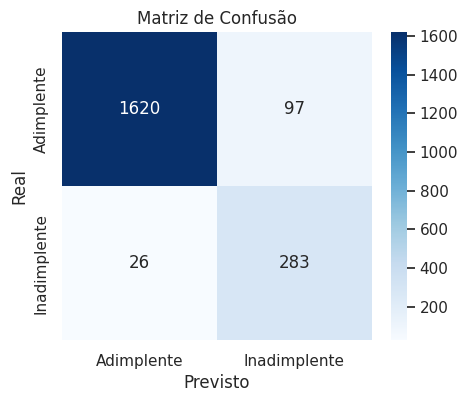

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1717
         1.0       0.74      0.92      0.82       309

    accuracy                           0.94      2026
   macro avg       0.86      0.93      0.89      2026
weighted avg       0.95      0.94      0.94      2026



In [ ]:
# Gerando matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizando a matriz
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Adimplente', 'Inadimplente'], yticklabels=['Adimplente', 'Inadimplente'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

# Relatório de classificação
print(classification_report(y_test, y_pred))

Em nosso modelo final obtivemos

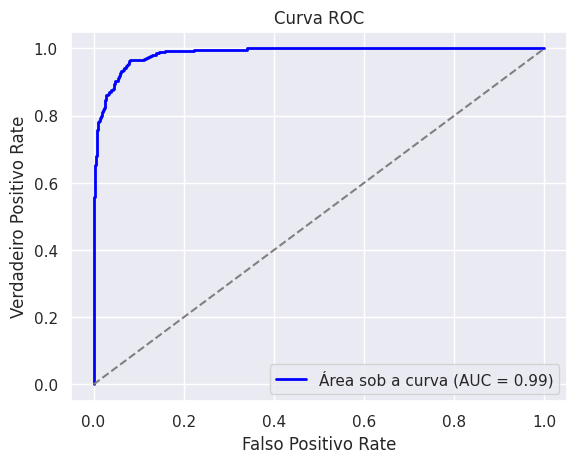

In [ ]:
# Curva ROC

fpr, tpr, _ = roc_curve(y_test, y_proba)
# using sklearn_auc to call function for calculating area under curve
roc_auc = auc(fpr, tpr) # Use auc instead of sklearn_auc

# Plot da Curva ROC
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Área sob a curva (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlabel("Falso Positivo Rate")
plt.ylabel("Verdadeiro Positivo Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

## Implementação<a name=implementacao></a>

<p align= "justify">

[Voltar ao índice](#Contents)

#### Salvando o modelo <a name=salvando></a>

<p align= "justify">

[Voltar ao índice](#Contents)

- Salvando a variável resposta (alvo)

In [ ]:
y

,default
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
10122,0.0
10123,1.0
10124,1.0
10125,1.0


In [ ]:
np.savetxt('alvo.csv', y, delimiter=',')

In [ ]:
X

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,1,3,1,0,2,0,39,5,3,1,12691.51,1144.90,42
1,49,0,5,3,3,4,0,44,6,2,1,8256.96,1291.45,33
2,51,1,3,3,0,3,0,36,4,0,1,3418.56,1887.72,20
3,40,0,4,1,2,4,0,34,3,1,4,3313.03,1171.56,20
4,40,1,3,5,0,2,0,21,5,0,1,4716.22,816.08,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,1,2,3,3,1,0,40,3,3,2,4003.91,15476.26,117
10123,41,1,2,4,1,1,0,25,4,3,2,4277.04,8764.88,69
10124,44,0,1,1,0,4,0,36,5,4,3,5409.16,10291.78,60
10125,30,1,2,3,2,1,0,36,4,3,3,5281.84,8395.62,62


In [ ]:
np.savetxt('previsores.csv', X, delimiter=',')

- Salvando o Modelo Final

In [ ]:
import joblib

joblib.dump(modelo, 'modelo_xgb.pkl')

['modelo_xgb.pkl']

### Criando uma função de predição <a name=funcao></a>

<p align= "justify">

[Voltar ao índice](#Contents)


In [ ]:
xg = XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=350, scale_pos_weight=scale_pos_weight, objective='binary:logistic', random_satate=0)
xg.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=None,
              num_parallel_tree=None, random_satate=0, ...)

- Criando a função de predição

In [ ]:
def simulacao(cliente):
 # Reshape the patient data to a 2D array with one row and multiple columns
  cliente = np.array(cliente).reshape(1, -1)
  # This ensures the input has the correct shape for XGBoost predict

  resultado = xg.predict(cliente)

  # Access the first element of the 'resultado' array using [0]
  if resultado[0].all == 1:
    print('O cliente aparesnta perfil para INADIMPLÊNCIA')
  else:
    print('O cliente aparesnta perfil para ADIMPLÊNCIA')

**Simulação de Novos Clientes**

In [ ]:
# Dados fictícios de novos clientes
dados_clientes = {
    'idade': [35, 21, 27],
    'sexo': ['0', '1', '0'],
    'dependentes': [2, 0, 1],
    'escolaridade': ['1', '0', '1'],
    'estado_civil': ['0', '2', '2'],
    'salario_anual': [0, 5, 1],
    'tipo_cartao': ['0', '0', '2'],
    'meses_de_relacionamento': [36, 24, 12],
    'qtd_produtos': [3, 2, 0],
    'iteracoes_12m': [42, 3, 1],
    'meses_inativo_12m': [2, 8, 10],
    'limite_credito': [15000.00, 1000.00, 2000.00],
    'valor_transacoes_12m': [7000.00, 1000.00, 900.00],
    'qtd_transacoes_12m': [60, 240, 120]
}

novos_clientes = pd.DataFrame(dados_clientes)

In [ ]:
    # Acessar e simular cada cliente
cliente1 = novos_clientes.loc[0]
cliente2 = novos_clientes.loc[1]
cliente3 = novos_clientes.loc[2]

# Rodar a simulação
simulacao(cliente1)
simulacao(cliente2)
simulacao(cliente3)

O cliente aparesnta perfil para ADIMPLÊNCIA
O cliente aparesnta perfil para ADIMPLÊNCIA
O cliente aparesnta perfil para ADIMPLÊNCIA


## Conclusão

### Entendimento do Problema e Análise Exploratória

<p align="justify">
O principal objetivo deste projeto foi compreender e prever o comportamento de clientes com potencial de se tornarem <b>inadimplentes em uma instituição financeira</b>, com base em dados do último ano. A variável alvo, <code>default</code>, possui dois grupos: <b>adimplentes</b> e <b>inadimplentes</b>. O desafio consistiu em investigar como as demais variáveis do conjunto de dados se relacionam com esse desfecho.
</p>

<p align="justify">
Após o tratamento e preparação dos dados, foram elaboradas visualizações comparativas entre a variável alvo e os principais atributos explicativos. A análise revelou que variáveis categóricas como <b>salário, escolaridade e estado civil</b> não apresentaram diferenças significativas entre os grupos.
</p>

<p align="justify">
Por outro lado, variáveis numéricas como <b>quantidade e valor das transações</b> evidenciaram um padrão relevante: clientes com <b>menor volume de transações</b> e <b>valores movimentados mais baixos</b> apresentaram maior propensão à inadimplência. Além disso, observou-se que clientes situados nos <b>extremos do limite de crédito</b> (muito baixos ou muito altos) concentram uma taxa maior de inadimplência.
</p>

<p align="justify">
Essas informações possibilitam a identificação de clientes com <b>perfil de risco elevado</b>, permitindo ações preventivas e estratégias direcionadas para mitigar perdas e promover a sustentabilidade financeira da instituição.
</p>

---

### Desempenho do Modelo

<p align='justify'>
Após o desenvolvimento e avaliação de diversos modelos de Machine Learning, o classificador <b>XGBoost otimizado</b> apresentou o melhor desempenho na tarefa de prever inadimplência. Com uma <b>acurácia de 93,88%</b> no conjunto de teste, o modelo demonstrou robustez e consistência. Destacam-se também as seguintes métricas:
</p>

<ul>
  <li><b>Recall</b> elevado (90,61%) indica que o modelo identifica a maioria dos inadimplentes, reduzindo os <b>falsos negativos</b> — fator crítico, já que conceder crédito a quem não vai pagar pode gerar grandes prejuízos.</li>
  <li><b>Precision</b> de 74,67% revela que a maioria dos clientes classificados como inadimplentes realmente apresenta esse perfil, com baixo índice de <b>falsos positivos</b>.</li>
  <li><b>F1-Score</b> de 81,87% demonstra um ótimo equilíbrio entre precisão e recall.</li>
  <li><b>AUC-ROC</b> de 98,59% evidencia uma excelente capacidade do modelo em separar corretamente adimplentes e inadimplentes.</li>
</ul>

<p align='justify'>
Esses resultados mostram que o modelo possui <b>alta capacidade de identificar inadimplentes (recall)</b> e também <b>boa precisão</b> na classificação dos maus pagadores, mesmo em um cenário de desbalanceamento da base.
</p>

---

### Principais Fatores Explicativos

<p align="justify">
A variável <b>qtd_transacoes_12m</b> (quantidade de transações em 12 meses) teve o maior impacto global no modelo. O gráfico de SHAP revelou que valores altos (em rosa) estão associados a valores SHAP negativos (à esquerda), indicando maior risco de inadimplência. Ou seja, menor quantidade de transações está ligada à maior chance de inadimplência.
</p>

<p align="justify">
A variável <b>valor_transacoes_12m</b> (valor total das transações em 12 meses) também se mostrou altamente relevante. Valores mais altos estão associados a SHAPs positivos (direita), indicando propensão à adimplência. Clientes que movimentam maiores quantias têm, portanto, menor risco de inadimplência.
</p>

<p align="justify">
Já <b>meses_inativo_12m</b> (meses de inatividade em 12 meses) apareceu como um fator importante: clientes com longos períodos de inatividade apresentaram maior propensão à inadimplência, segundo a análise SHAP.
</p>

<p align="justify">
A análise das <b>variáveis mais importantes</b> permitiu identificar os principais fatores associados à inadimplência, contribuindo para a geração de <b>insights estratégicos</b> que podem aperfeiçoar as políticas de concessão de crédito.
</p>

---

## Relevância para o Negócio

<p align="justify">
A capacidade de prever a inadimplência de clientes é fundamental para instituições financeiras e empresas que concedem crédito, pois permite:
</p>

- **Reduzir o risco de perdas financeiras**, evitando concessões a perfis de alto risco.  
- **Aprimorar a gestão da carteira de clientes**, priorizando aqueles com menor risco.  
- **Tomar decisões estratégicas baseadas em dados históricos e padrões de comportamento.**

---

### Recomendações Práticas

1. **Validação contínua do modelo**: monitorar a performance com dados novos periodicamente para garantir a eficácia ao longo do tempo.  
2. **Enriquecimento da base de dados**: incluir variáveis adicionais, como histórico de crédito e comportamento de pagamento, pode aumentar a acurácia e interpretabilidade.  
3. **Experimentar técnicas de reamostragem**, como SMOTE ou ROSE, para comparar com o uso exclusivo de `scale_pos_weight`.

---

### Aplicação em Ambiente Real

<p align="justify">
Este modelo pode ser integrado a um <b>formulário de solicitação de crédito</b> em tempo real. Por exemplo:
</p>

- O cliente preenche seus dados (renda, tempo de emprego, estado civil etc.);
- Os dados são processados por uma API com o modelo treinado;
- O modelo retorna a probabilidade de inadimplência;
- Com base nesse score, a empresa decide aprovar, negar ou encaminhar para análise manual.

<p align="justify">
Essa automação promove agilidade, padronização e assertividade na análise de crédito, otimizando o processo de decisão e contribuindo para a saúde financeira da instituição.
</p>

---